In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
from sklearn.ensemble import RandomForestRegressor

In [7]:
from sklearn.tree import DecisionTreeRegressor

In [8]:
from sklearn.neighbors import KNeighborsRegressor

In [9]:
import xgboost as xgb

In [10]:
from sklearn.model_selection import train_test_split,KFold,cross_val_score

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
from sklearn.metrics import r2_score,mean_squared_error

In [13]:
from sklearn.metrics import classification_report

In [14]:
df=pd.read_csv("Walmart.csv")


In [15]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [16]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [18]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [19]:
df.shape

(6435, 8)

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Store'>

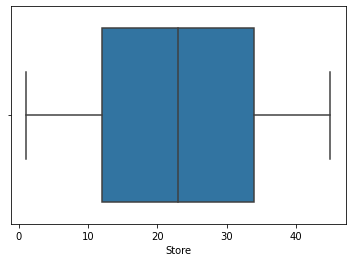

In [20]:
sns.boxplot(df['Store'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Temperature'>

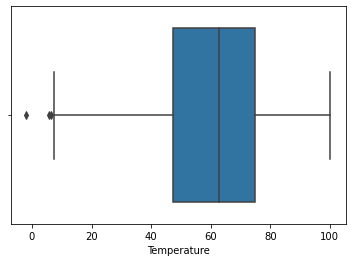

In [21]:
sns.boxplot(df['Temperature'])

In [22]:
q1=df['Temperature'].quantile(0.25)

In [23]:
q3=df['Temperature'].quantile(0.75)

In [24]:
IQR=q3-q1

In [25]:
lower=q1-1.5*IQR

In [26]:
upper=q3+1.5*IQR

In [27]:
df=df[(df['Temperature']>lower) & (df['Temperature']<upper)]

In [28]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fuel_Price'>

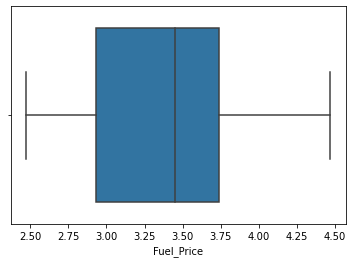

In [29]:
sns.boxplot(df['Fuel_Price'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CPI'>

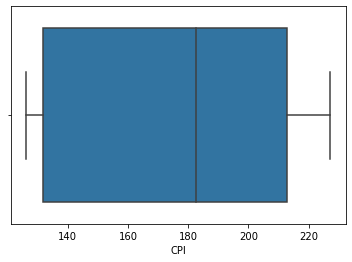

In [30]:
sns.boxplot(df['CPI'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Unemployment'>

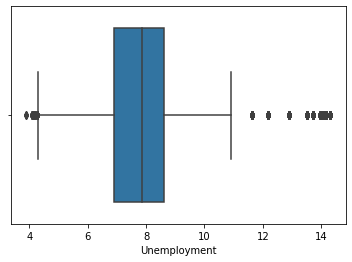

In [31]:
sns.boxplot(df['Unemployment'])

In [32]:
q1=df['Unemployment'].quantile(0.25)

In [33]:
q3=df['Unemployment'].quantile(0.75)

In [34]:
IQR=q3-q1

In [35]:
lower=q1-1.5*IQR

In [36]:
upper=q3+1.5*IQR

In [37]:
df=df[(df['Unemployment']>lower) & (df['Unemployment']<upper)]

In [38]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Holiday_Flag'>

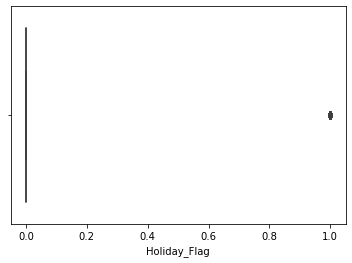

In [39]:
sns.boxplot(df['Holiday_Flag'])

In [40]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [41]:
df['Date']=pd.to_datetime(df['Date'])



C:\Users\himanshu\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19-02-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\himanshu\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '26-02-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\himanshu\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19-03-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\himanshu\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '26-03-2010' in DD/MM/YYYY format. Provide form

In [42]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


In [43]:
df['Month']=df['Date'].dt.month

C:\Users\himanshu\AppData\Local\Temp\ipykernel_18656\1855346815.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month']=df['Date'].dt.month


In [44]:
df['Year']=df['Date'].dt.year

C:\Users\himanshu\AppData\Local\Temp\ipykernel_18656\2632089269.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year']=df['Date'].dt.year


In [45]:
df['Day']=df['Date'].dt.day

C:\Users\himanshu\AppData\Local\Temp\ipykernel_18656\2634055668.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Day']=df['Date'].dt.day


In [46]:
df['quarter'] = pd.PeriodIndex(df.Date, freq='Q')

C:\Users\himanshu\AppData\Local\Temp\ipykernel_18656\2850330586.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['quarter'] = pd.PeriodIndex(df.Date, freq='Q')


In [47]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year,Day,quarter
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,5,2010,2,2010Q2
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,12,2010,2,2010Q4
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010,19,2010Q1
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010,26,2010Q1
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,5,2010,3,2010Q2
...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,9,2012,28,2012Q3
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,5,2012,10,2012Q2
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,12,2012,10,2012Q4
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,10,2012,19,2012Q4


In [48]:
df['week']=df['Date'].dt.week

C:\Users\himanshu\AppData\Local\Temp\ipykernel_18656\475266402.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['week']=df['Date'].dt.week
C:\Users\himanshu\AppData\Local\Temp\ipykernel_18656\475266402.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['week']=df['Date'].dt.week


In [49]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year,Day,quarter,week
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,5,2010,2,2010Q2,17
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,12,2010,2,2010Q4,48
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010,19,2010Q1,7
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010,26,2010Q1,8
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,5,2010,3,2010Q2,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,9,2012,28,2012Q3,39
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,5,2012,10,2012Q2,19
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,12,2012,10,2012Q4,50
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,10,2012,19,2012Q4,42


In [50]:
df['Day Of Week']=df['Date'].dt.day_of_week


C:\Users\himanshu\AppData\Local\Temp\ipykernel_18656\2895530276.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Day Of Week']=df['Date'].dt.day_of_week


In [51]:
df['Day_Name']=df['Date'].dt.day_name()

C:\Users\himanshu\AppData\Local\Temp\ipykernel_18656\906889134.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Day_Name']=df['Date'].dt.day_name()


In [52]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year,Day,quarter,week,Day Of Week,Day_Name
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,5,2010,2,2010Q2,17,6,Sunday
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,12,2010,2,2010Q4,48,3,Thursday
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010,19,2010Q1,7,4,Friday
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010,26,2010Q1,8,4,Friday
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,5,2010,3,2010Q2,18,0,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,9,2012,28,2012Q3,39,4,Friday
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,5,2012,10,2012Q2,19,3,Thursday
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,12,2012,10,2012Q4,50,0,Monday
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,10,2012,19,2012Q4,42,4,Friday


In [53]:
df=df.drop('Date',axis=1)


In [54]:
df

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year,Day,quarter,week,Day Of Week,Day_Name
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,5,2010,2,2010Q2,17,6,Sunday
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,12,2010,2,2010Q4,48,3,Thursday
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010,19,2010Q1,7,4,Friday
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010,26,2010Q1,8,4,Friday
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,5,2010,3,2010Q2,18,0,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,713173.95,0,64.88,3.997,192.013558,8.684,9,2012,28,2012Q3,39,4,Friday
6431,45,733455.07,0,64.89,3.985,192.170412,8.667,5,2012,10,2012Q2,19,3,Thursday
6432,45,734464.36,0,54.47,4.000,192.327265,8.667,12,2012,10,2012Q4,50,0,Monday
6433,45,718125.53,0,56.47,3.969,192.330854,8.667,10,2012,19,2012Q4,42,4,Friday


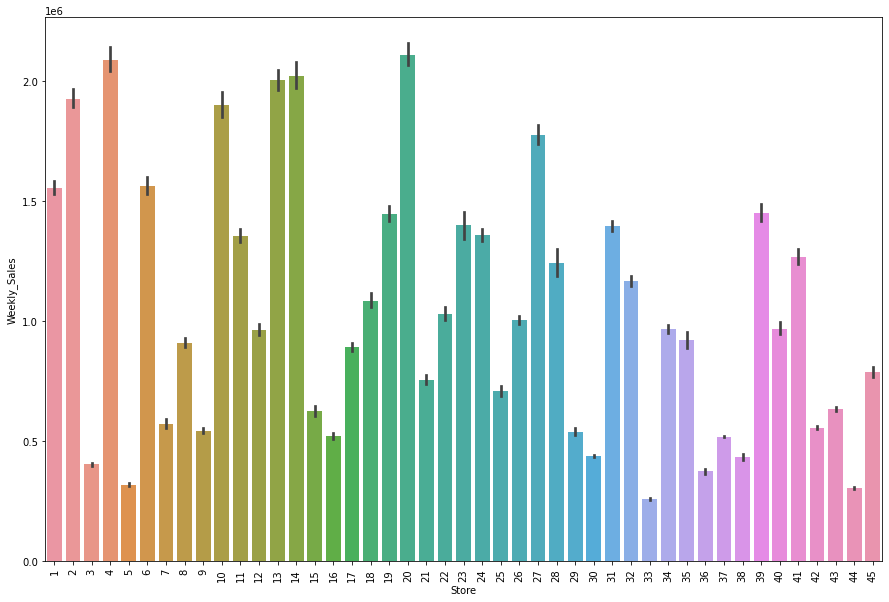

In [55]:
plt.figure(figsize=(15,10))
sns.barplot(x=df['Store'],y=df['Weekly_Sales'])
plt.xticks(rotation=90)
plt.show()

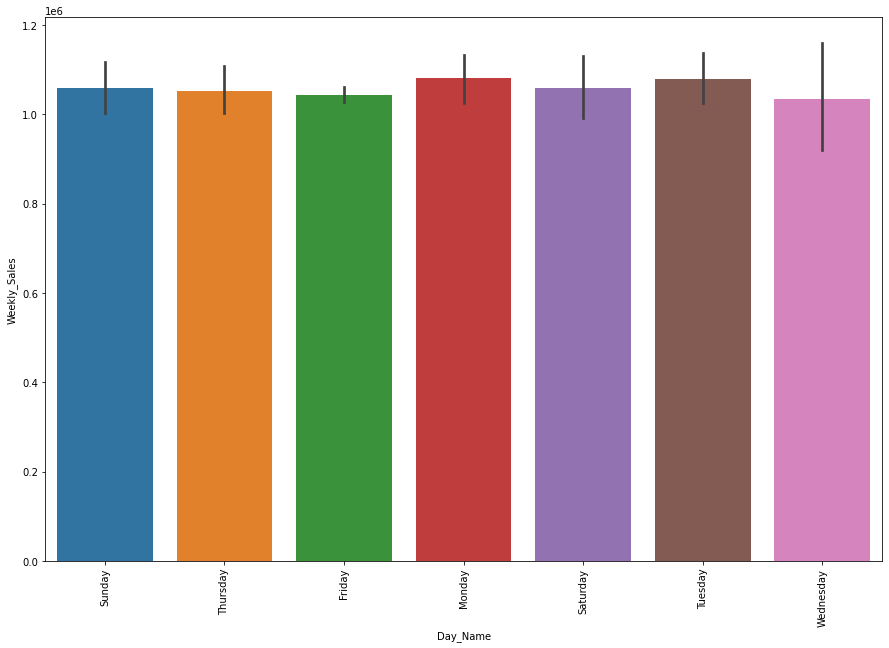

In [56]:
plt.figure(figsize=(15,10))
sns.barplot(x=df['Day_Name'],y=df['Weekly_Sales'])
plt.xticks(rotation=90)
plt.show()

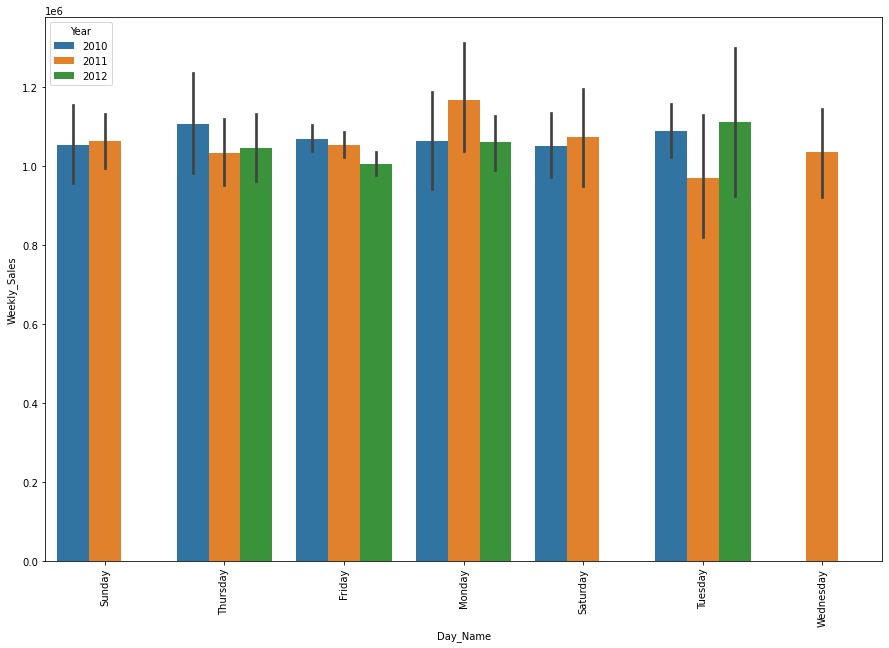

In [57]:
plt.figure(figsize=(15,10))
sns.barplot(x=df['Day_Name'],y=df['Weekly_Sales'],hue=df['Year'])
plt.xticks(rotation=90)
plt.show()

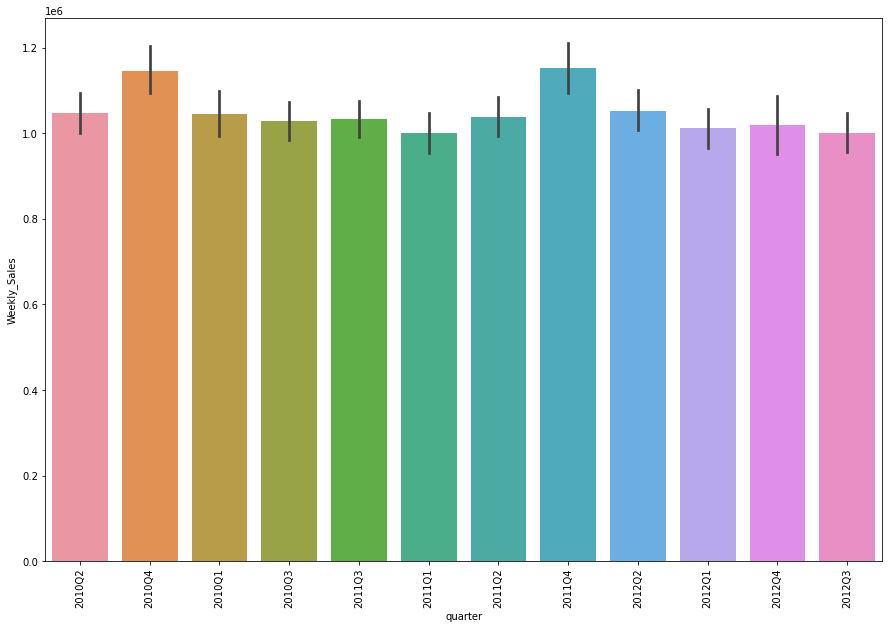

In [58]:
plt.figure(figsize=(15,10))
sns.barplot(x=df['quarter'],y=df['Weekly_Sales'])
plt.xticks(rotation=90)
plt.show()

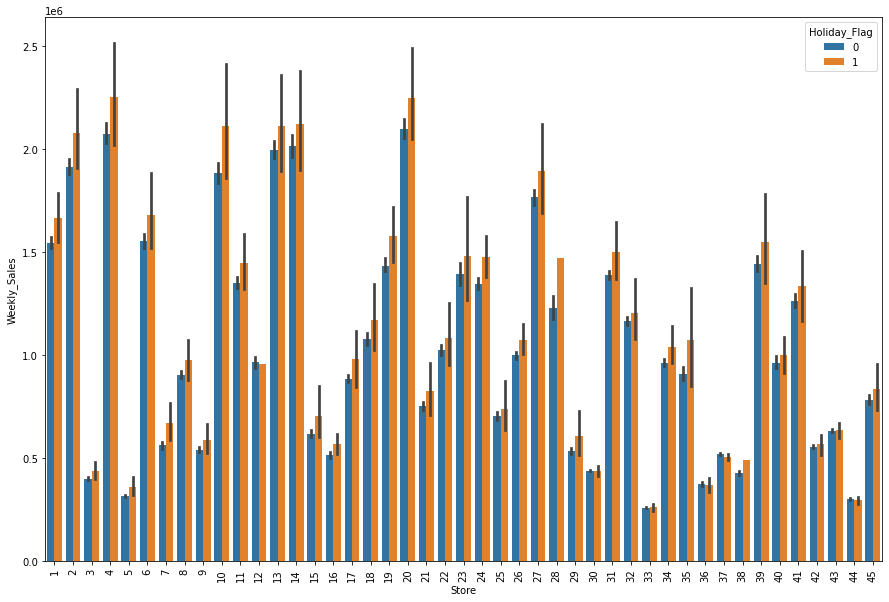

In [59]:
plt.figure(figsize=(15,10))
sns.barplot(x=df['Store'],y=df['Weekly_Sales'],hue=df['Holiday_Flag'])
plt.xticks(rotation=90)
plt.show()

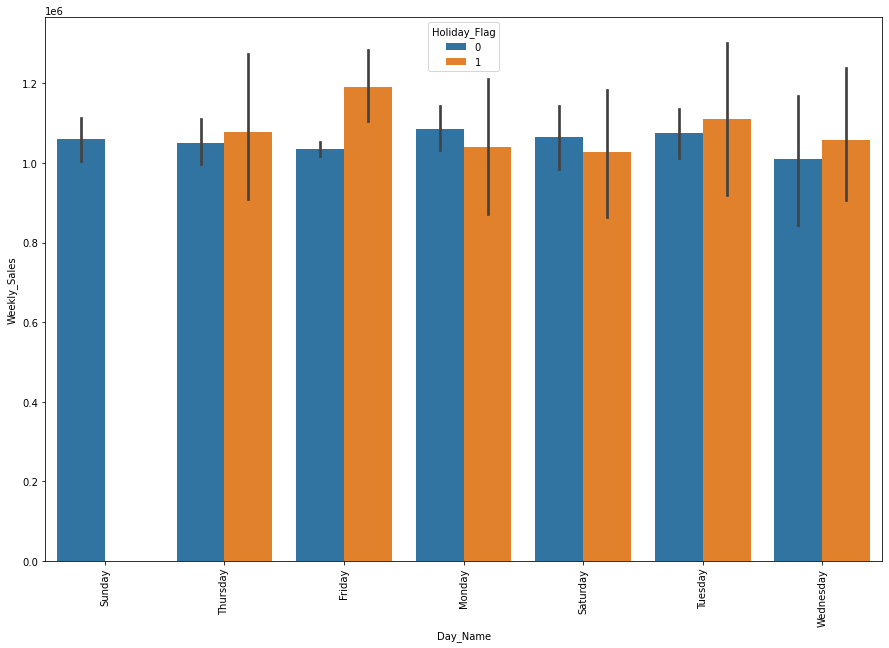

In [60]:
plt.figure(figsize=(15,10))
sns.barplot(x=df['Day_Name'],y=df['Weekly_Sales'],hue=df['Holiday_Flag'])
plt.xticks(rotation=90)
plt.show()

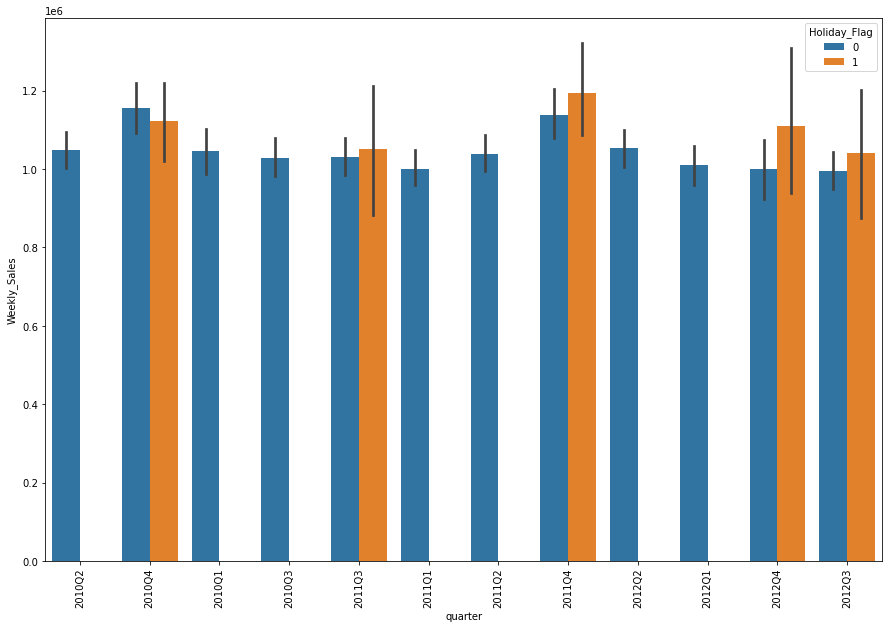

In [61]:
plt.figure(figsize=(15,10))
sns.barplot(x=df['quarter'],y=df['Weekly_Sales'],hue=df['Holiday_Flag'])
plt.xticks(rotation=90)
plt.show()

In [62]:
df

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year,Day,quarter,week,Day Of Week,Day_Name
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,5,2010,2,2010Q2,17,6,Sunday
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,12,2010,2,2010Q4,48,3,Thursday
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010,19,2010Q1,7,4,Friday
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010,26,2010Q1,8,4,Friday
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,5,2010,3,2010Q2,18,0,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,713173.95,0,64.88,3.997,192.013558,8.684,9,2012,28,2012Q3,39,4,Friday
6431,45,733455.07,0,64.89,3.985,192.170412,8.667,5,2012,10,2012Q2,19,3,Thursday
6432,45,734464.36,0,54.47,4.000,192.327265,8.667,12,2012,10,2012Q4,50,0,Monday
6433,45,718125.53,0,56.47,3.969,192.330854,8.667,10,2012,19,2012Q4,42,4,Friday


<AxesSubplot:xlabel='Month', ylabel='Weekly_Sales'>

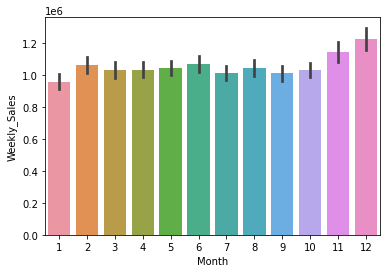

In [63]:
sns.barplot(x=df['Month'],y=df['Weekly_Sales'])

<AxesSubplot:xlabel='Year', ylabel='Weekly_Sales'>

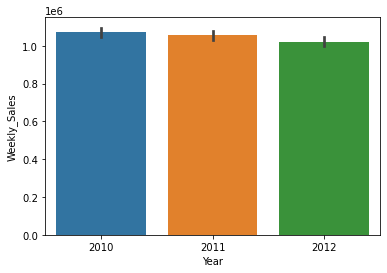

In [64]:
sns.barplot(x=df['Year'],y=df['Weekly_Sales'])

<AxesSubplot:xlabel='Month', ylabel='Weekly_Sales'>

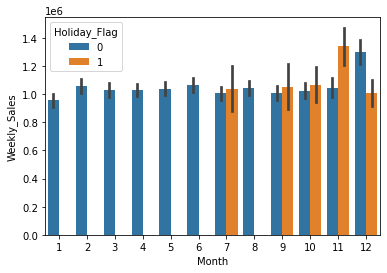

In [65]:
sns.barplot(x=df['Month'],y=df['Weekly_Sales'],hue=df['Holiday_Flag'])

<AxesSubplot:xlabel='Year', ylabel='Weekly_Sales'>

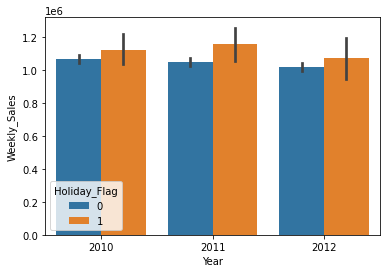

In [66]:
sns.barplot(x=df['Year'],y=df['Weekly_Sales'],hue=df['Holiday_Flag'])

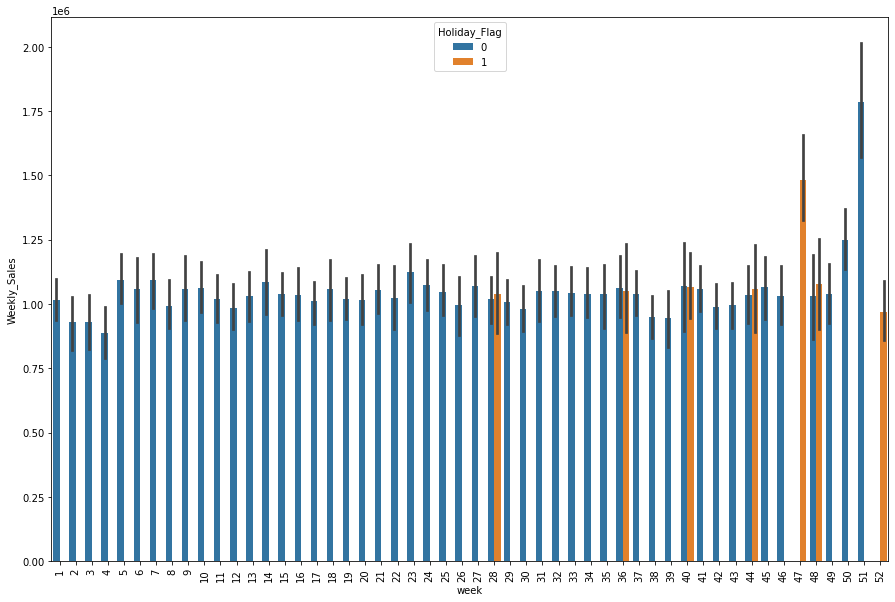

In [67]:
plt.figure(figsize=(15,10))
sns.barplot(x=df['week'],y=df['Weekly_Sales'],hue=df['Holiday_Flag'])
plt.xticks(rotation=90)
plt.show()

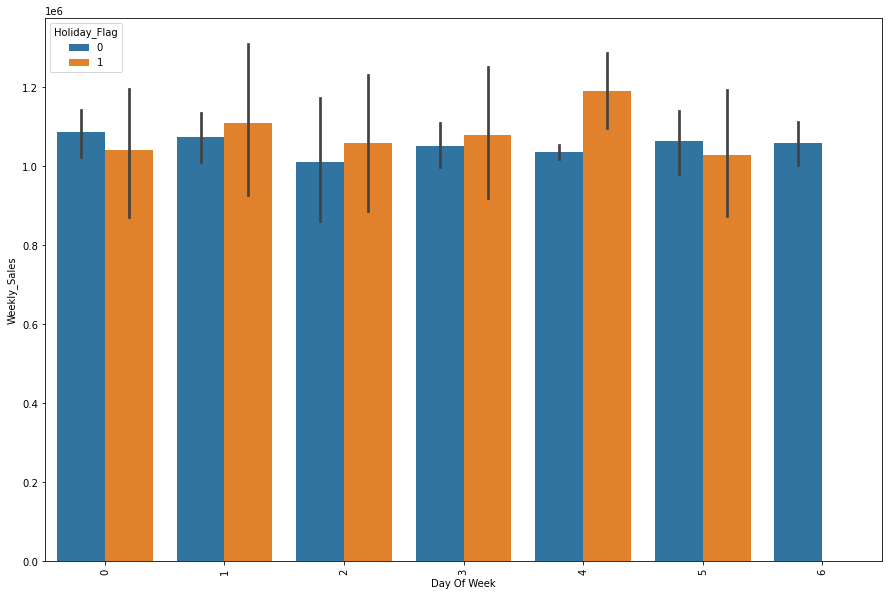

In [68]:
plt.figure(figsize=(15,10))
sns.barplot(x=df['Day Of Week'],y=df['Weekly_Sales'],hue=df['Holiday_Flag'])
plt.xticks(rotation=90)
plt.show()

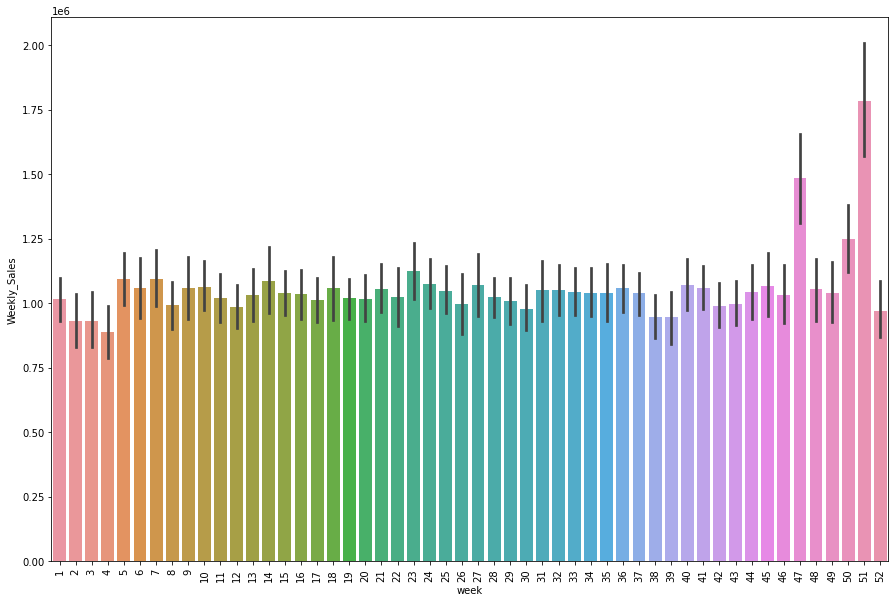

In [69]:
plt.figure(figsize=(15,10))
sns.barplot(x=df['week'],y=df['Weekly_Sales'])
plt.xticks(rotation=90)
plt.show()

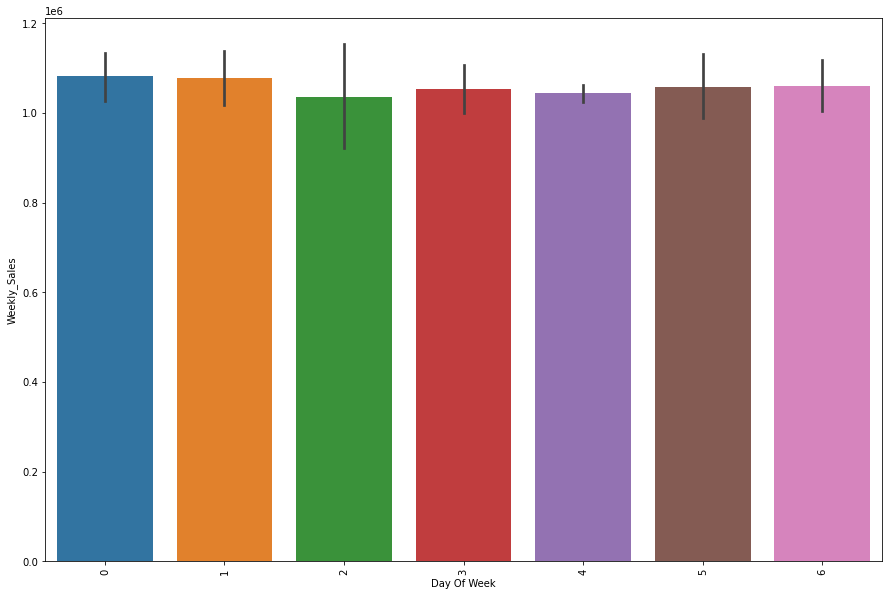

In [70]:
plt.figure(figsize=(15,10))
sns.barplot(x=df['Day Of Week'],y=df['Weekly_Sales'])
plt.xticks(rotation=90)
plt.show()

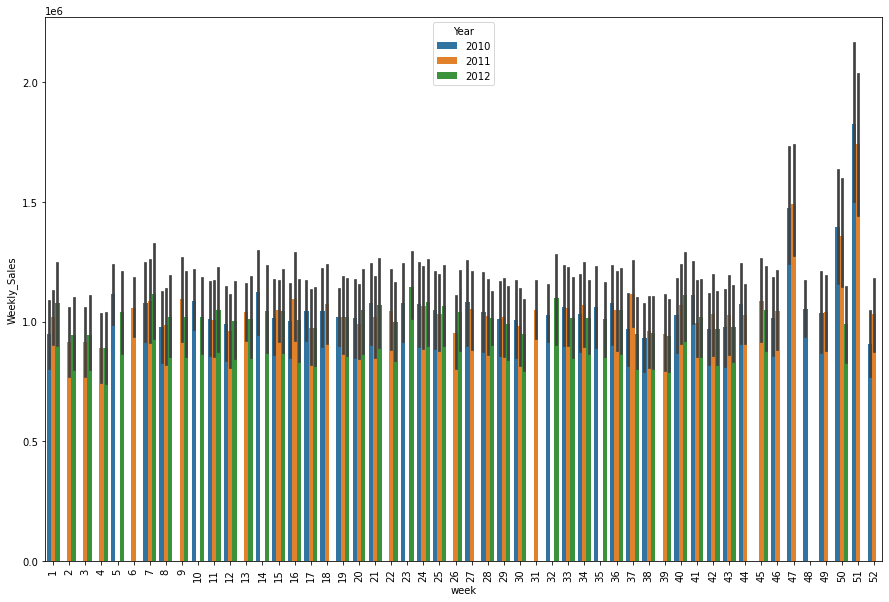

In [71]:
plt.figure(figsize=(15,10))
sns.barplot(x=df['week'],y=df['Weekly_Sales'],hue=df['Year'])
plt.xticks(rotation=90)
plt.show()

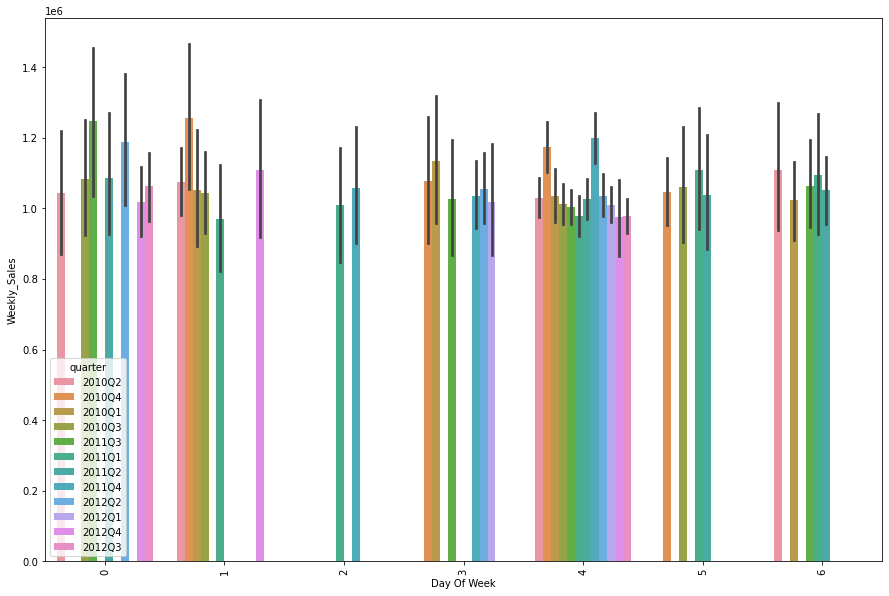

In [72]:
plt.figure(figsize=(15,10))
sns.barplot(x=df['Day Of Week'],y=df['Weekly_Sales'],hue=df['quarter'])
plt.xticks(rotation=90)
plt.show()

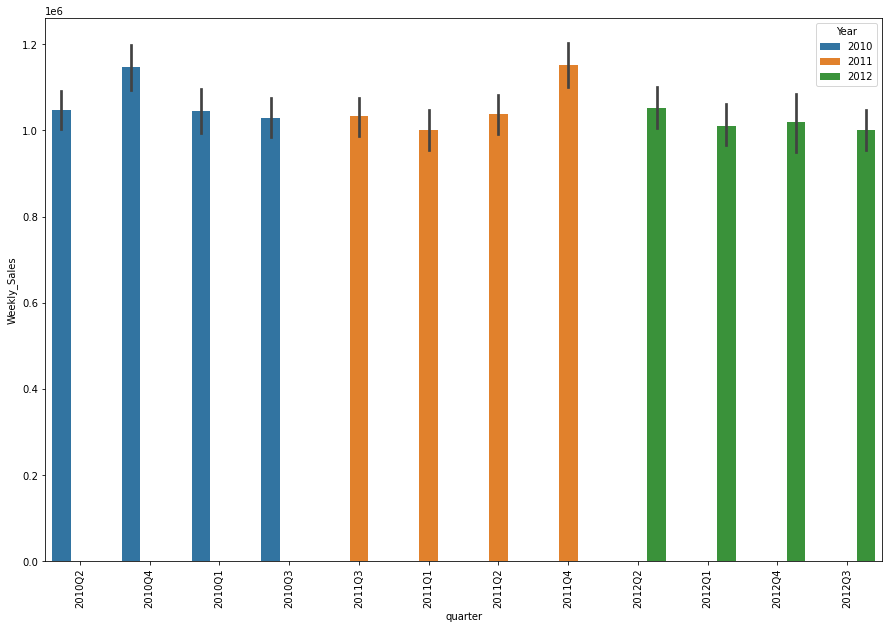

In [73]:
plt.figure(figsize=(15,10))
sns.barplot(x=df['quarter'],y=df['Weekly_Sales'],hue=df['Year'])
plt.xticks(rotation=90)
plt.show()

In [74]:
df

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year,Day,quarter,week,Day Of Week,Day_Name
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,5,2010,2,2010Q2,17,6,Sunday
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,12,2010,2,2010Q4,48,3,Thursday
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010,19,2010Q1,7,4,Friday
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010,26,2010Q1,8,4,Friday
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,5,2010,3,2010Q2,18,0,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,713173.95,0,64.88,3.997,192.013558,8.684,9,2012,28,2012Q3,39,4,Friday
6431,45,733455.07,0,64.89,3.985,192.170412,8.667,5,2012,10,2012Q2,19,3,Thursday
6432,45,734464.36,0,54.47,4.000,192.327265,8.667,12,2012,10,2012Q4,50,0,Monday
6433,45,718125.53,0,56.47,3.969,192.330854,8.667,10,2012,19,2012Q4,42,4,Friday


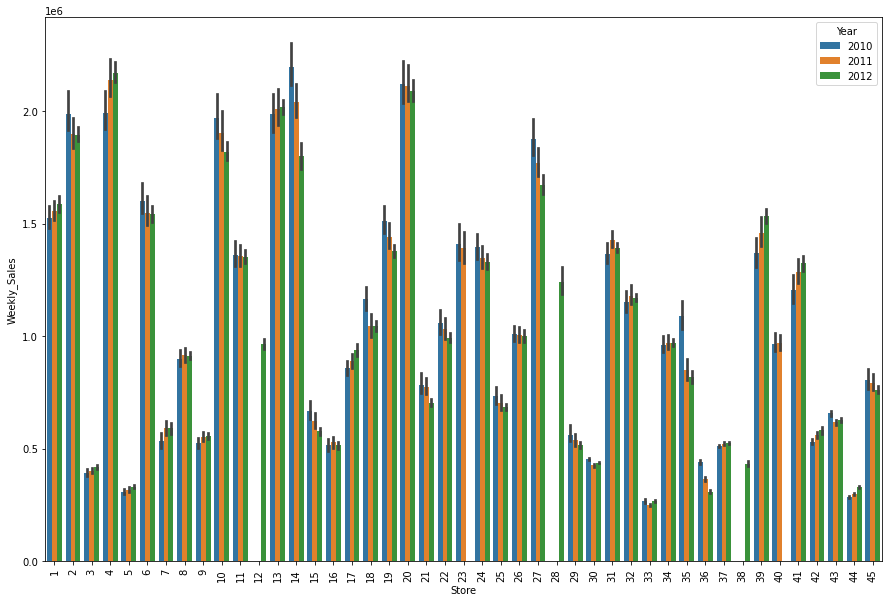

In [75]:
plt.figure(figsize=(15,10))
sns.barplot(x=df['Store'],y=df['Weekly_Sales'],hue=df['Year'])
plt.xticks(rotation=90)
plt.show()

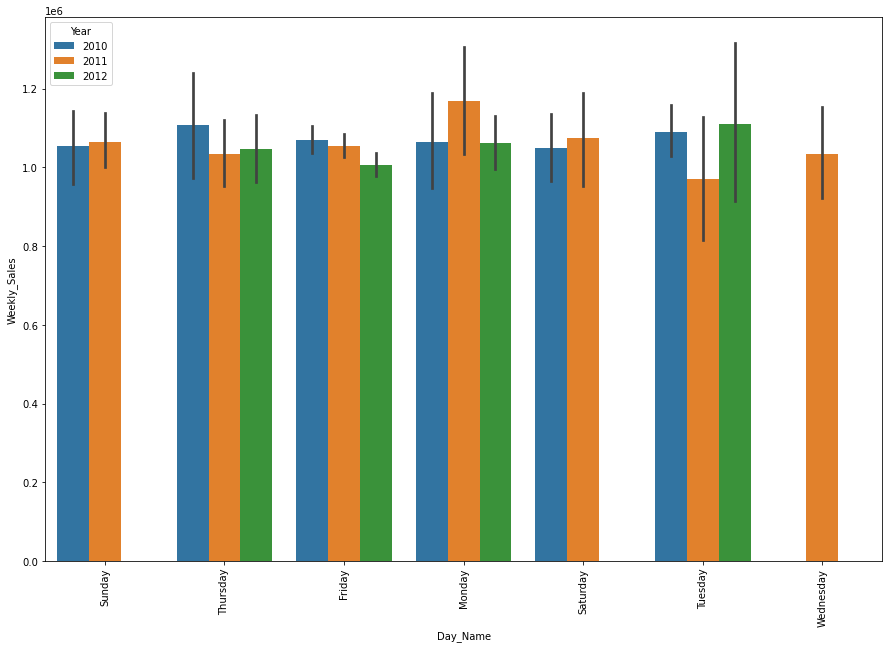

In [76]:
plt.figure(figsize=(15,10))
sns.barplot(x=df['Day_Name'],y=df['Weekly_Sales'],hue=df['Year'])
plt.xticks(rotation=90)
plt.show()

In [77]:
df

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year,Day,quarter,week,Day Of Week,Day_Name
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,5,2010,2,2010Q2,17,6,Sunday
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,12,2010,2,2010Q4,48,3,Thursday
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010,19,2010Q1,7,4,Friday
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010,26,2010Q1,8,4,Friday
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,5,2010,3,2010Q2,18,0,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,713173.95,0,64.88,3.997,192.013558,8.684,9,2012,28,2012Q3,39,4,Friday
6431,45,733455.07,0,64.89,3.985,192.170412,8.667,5,2012,10,2012Q2,19,3,Thursday
6432,45,734464.36,0,54.47,4.000,192.327265,8.667,12,2012,10,2012Q4,50,0,Monday
6433,45,718125.53,0,56.47,3.969,192.330854,8.667,10,2012,19,2012Q4,42,4,Friday


<AxesSubplot:xlabel='Day Of Week', ylabel='Weekly_Sales'>

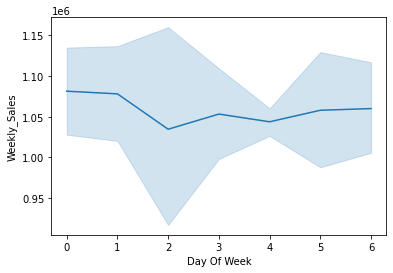

In [78]:
sns.lineplot(x=df['Day Of Week'],y=df['Weekly_Sales'])

<AxesSubplot:xlabel='Day_Name', ylabel='Weekly_Sales'>

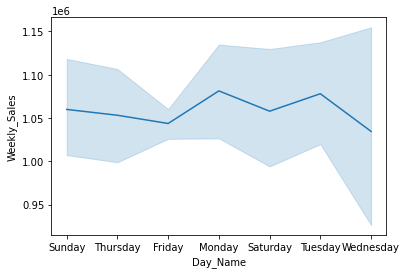

In [79]:
sns.lineplot(x=df['Day_Name'],y=df['Weekly_Sales'])

<AxesSubplot:xlabel='week', ylabel='Weekly_Sales'>

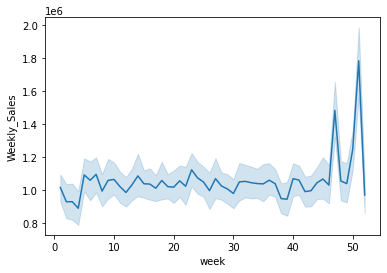

In [80]:
sns.lineplot(x=df['week'],y=df['Weekly_Sales'])

<AxesSubplot:xlabel='week', ylabel='Weekly_Sales'>

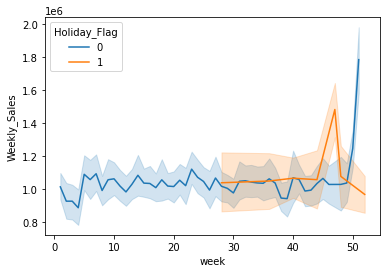

In [81]:
sns.lineplot(x=df['week'],y=df['Weekly_Sales'],hue=df['Holiday_Flag'])

<AxesSubplot:xlabel='Day Of Week', ylabel='Weekly_Sales'>

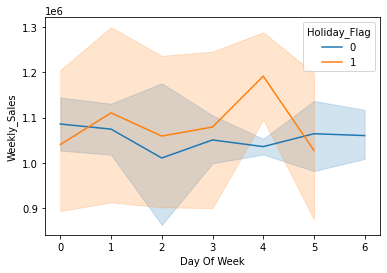

In [82]:
sns.lineplot(x=df['Day Of Week'],y=df['Weekly_Sales'],hue=df['Holiday_Flag'])

<AxesSubplot:xlabel='Day_Name', ylabel='Weekly_Sales'>

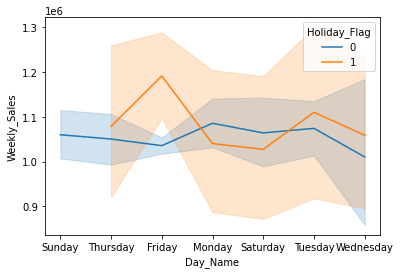

In [83]:
sns.lineplot(x=df['Day_Name'],y=df['Weekly_Sales'],hue=df['Holiday_Flag'])

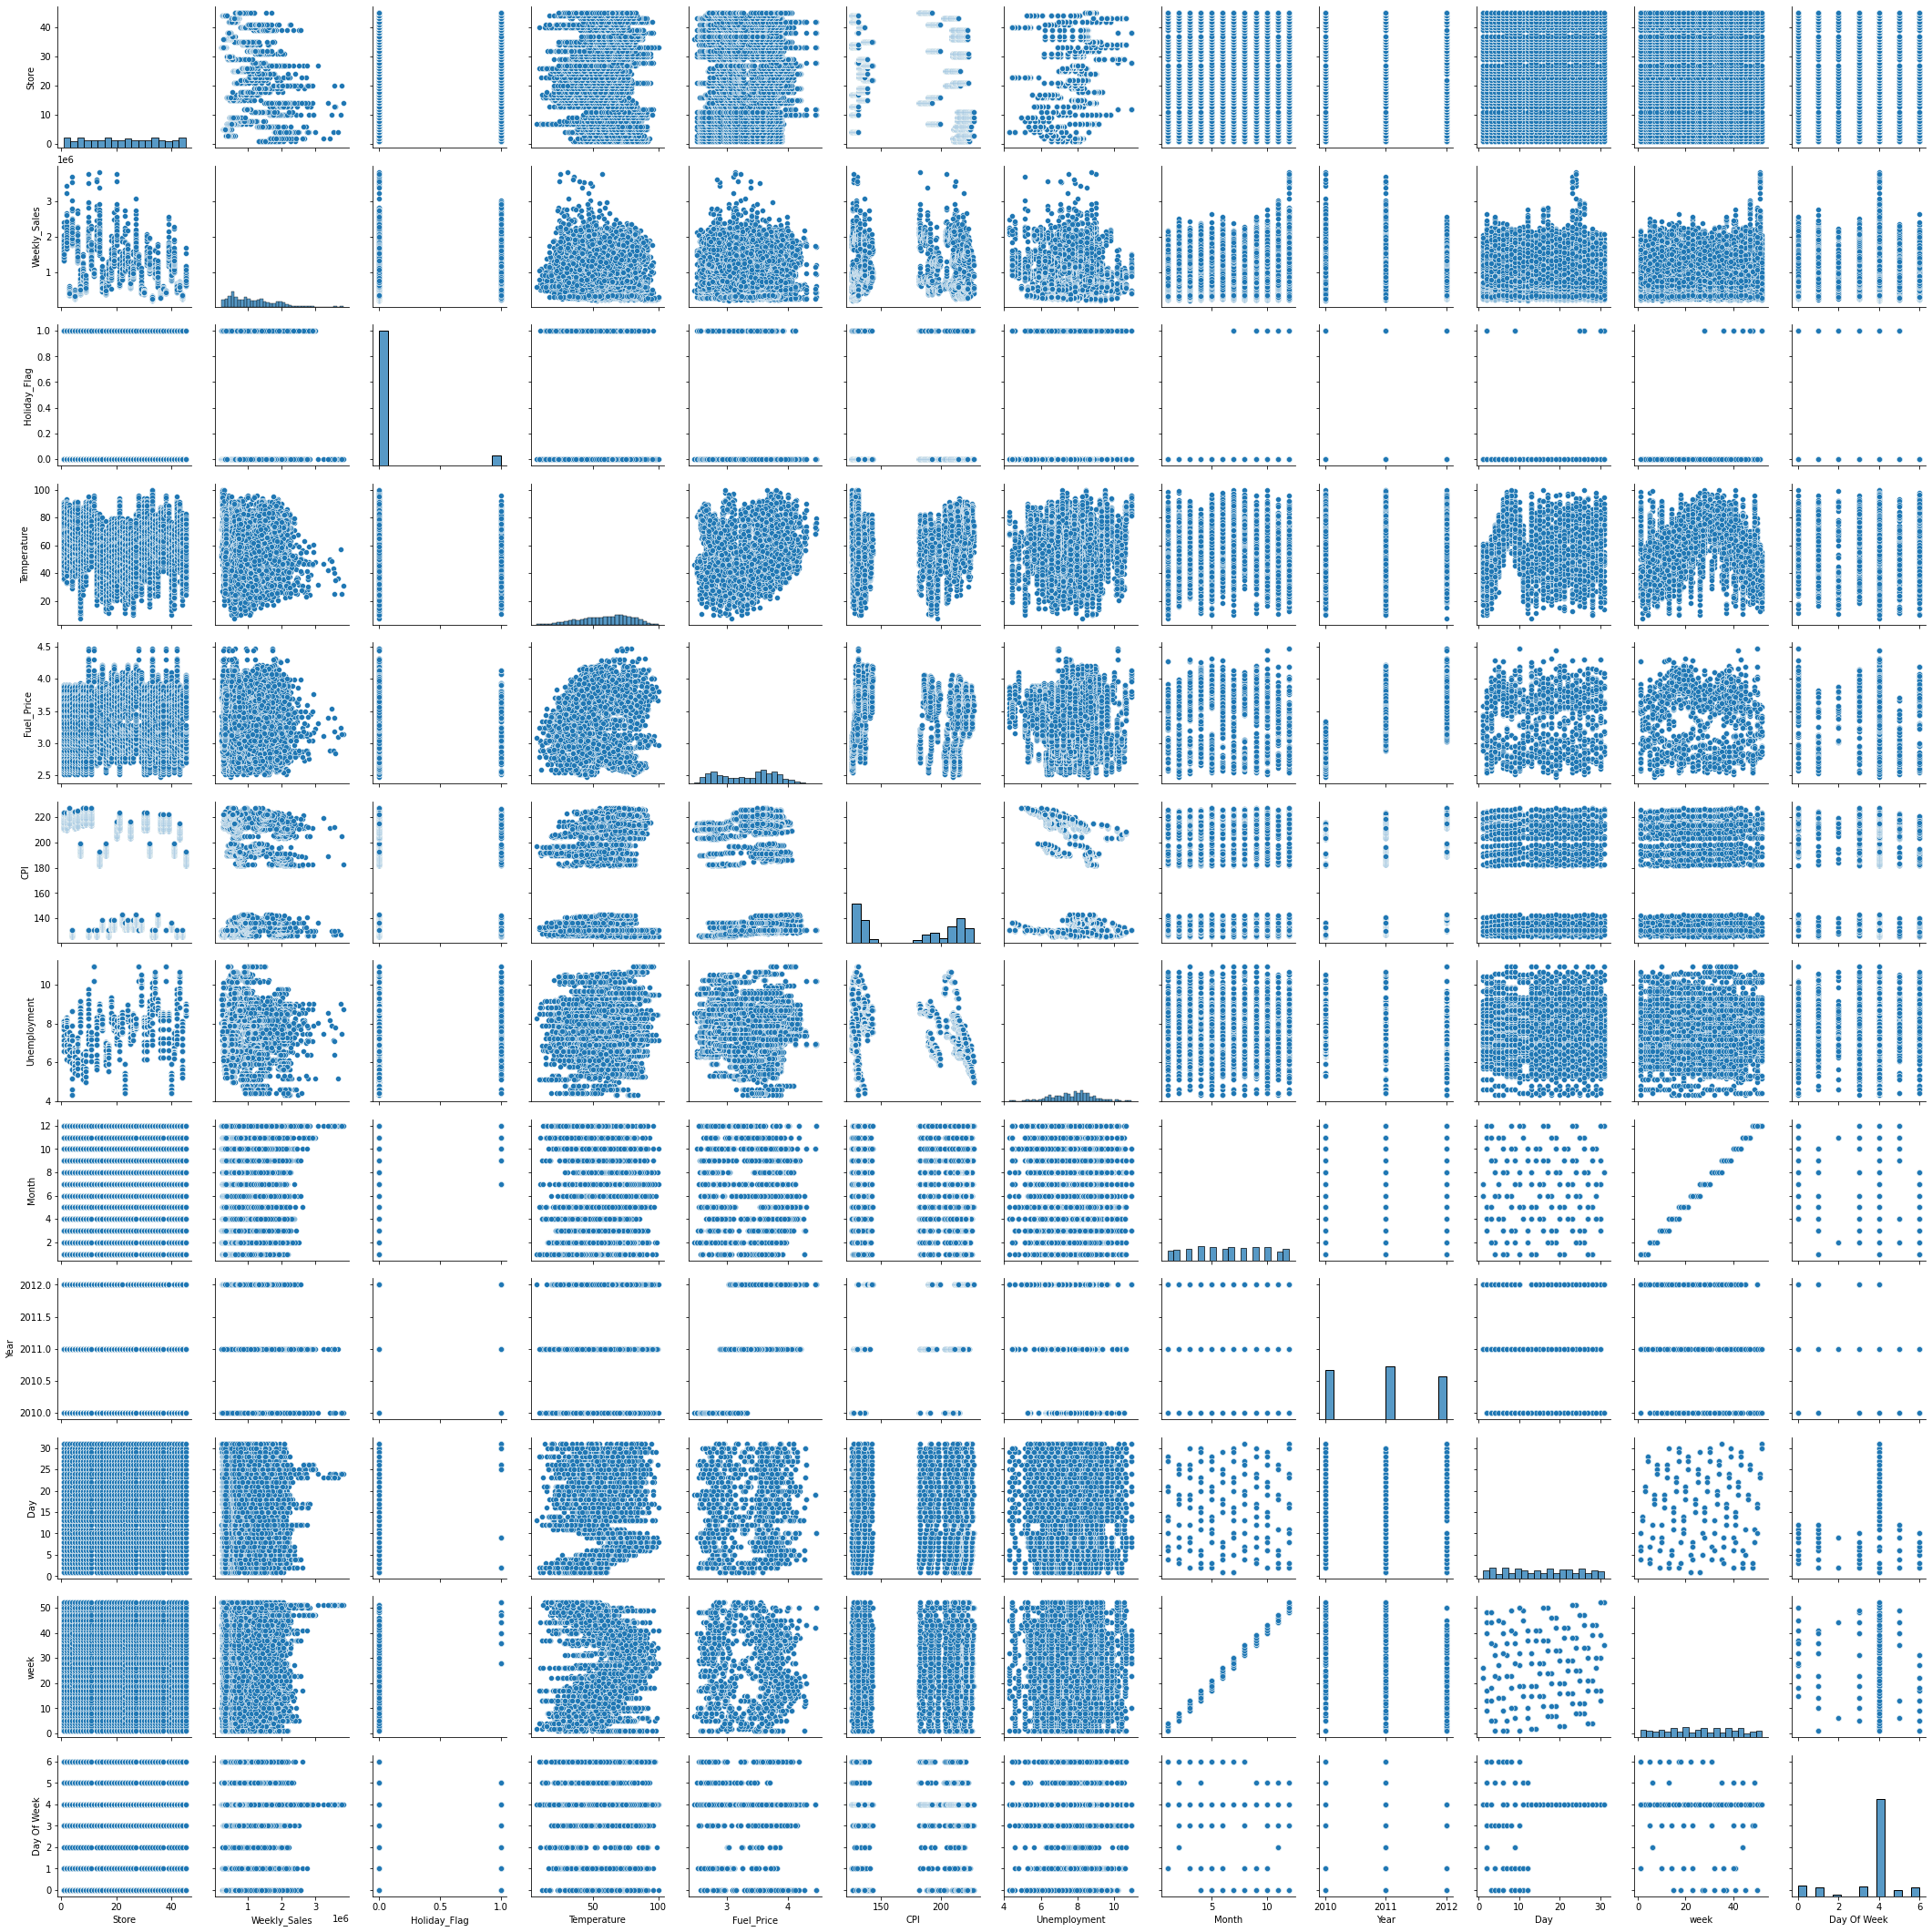

In [84]:
sns.pairplot(data=df)

In [85]:
df

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year,Day,quarter,week,Day Of Week,Day_Name
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,5,2010,2,2010Q2,17,6,Sunday
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,12,2010,2,2010Q4,48,3,Thursday
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010,19,2010Q1,7,4,Friday
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010,26,2010Q1,8,4,Friday
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,5,2010,3,2010Q2,18,0,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,713173.95,0,64.88,3.997,192.013558,8.684,9,2012,28,2012Q3,39,4,Friday
6431,45,733455.07,0,64.89,3.985,192.170412,8.667,5,2012,10,2012Q2,19,3,Thursday
6432,45,734464.36,0,54.47,4.000,192.327265,8.667,12,2012,10,2012Q4,50,0,Monday
6433,45,718125.53,0,56.47,3.969,192.330854,8.667,10,2012,19,2012Q4,42,4,Friday


In [86]:
df['Temperature_Range']=pd.qcut(df['Temperature'],4)


In [87]:
df['Fuel_Price_Range']=pd.qcut(df['Fuel_Price'],4)

In [88]:
df['CPI_Range']=pd.qcut(df['CPI'],4)

In [89]:
df['Unemployment_Range']=pd.qcut(df['Unemployment'],4)

In [90]:
df

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year,Day,quarter,week,Day Of Week,Day_Name,Temperature_Range,Fuel_Price_Range,CPI_Range,Unemployment_Range
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,5,2010,2,2010Q2,17,6,Sunday,"(7.459, 46.795]","(2.471, 2.891]","(189.842, 213.765]","(7.852, 8.494]"
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,12,2010,2,2010Q4,48,3,Thursday,"(7.459, 46.795]","(2.471, 2.891]","(189.842, 213.765]","(7.852, 8.494]"
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010,19,2010Q1,7,4,Friday,"(7.459, 46.795]","(2.471, 2.891]","(189.842, 213.765]","(7.852, 8.494]"
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010,26,2010Q1,8,4,Friday,"(7.459, 46.795]","(2.471, 2.891]","(189.842, 213.765]","(7.852, 8.494]"
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,5,2010,3,2010Q2,18,0,Monday,"(7.459, 46.795]","(2.471, 2.891]","(189.842, 213.765]","(7.852, 8.494]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,713173.95,0,64.88,3.997,192.013558,8.684,9,2012,28,2012Q3,39,4,Friday,"(62.4, 74.665]","(3.72, 4.468]","(189.842, 213.765]","(8.494, 10.926]"
6431,45,733455.07,0,64.89,3.985,192.170412,8.667,5,2012,10,2012Q2,19,3,Thursday,"(62.4, 74.665]","(3.72, 4.468]","(189.842, 213.765]","(8.494, 10.926]"
6432,45,734464.36,0,54.47,4.000,192.327265,8.667,12,2012,10,2012Q4,50,0,Monday,"(46.795, 62.4]","(3.72, 4.468]","(189.842, 213.765]","(8.494, 10.926]"
6433,45,718125.53,0,56.47,3.969,192.330854,8.667,10,2012,19,2012Q4,42,4,Friday,"(46.795, 62.4]","(3.72, 4.468]","(189.842, 213.765]","(8.494, 10.926]"


<AxesSubplot:xlabel='Temperature_Range', ylabel='Weekly_Sales'>

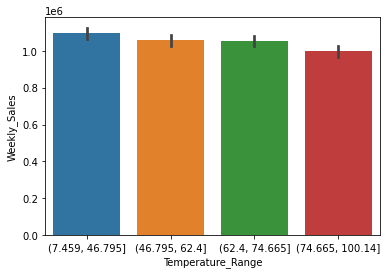

In [91]:
sns.barplot(x=df['Temperature_Range'],y=df['Weekly_Sales'])

<AxesSubplot:xlabel='Temperature_Range', ylabel='Weekly_Sales'>

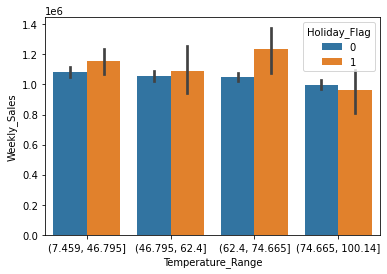

In [92]:
sns.barplot(x=df['Temperature_Range'],y=df['Weekly_Sales'],hue=df['Holiday_Flag'])

<AxesSubplot:xlabel='Fuel_Price_Range', ylabel='Weekly_Sales'>

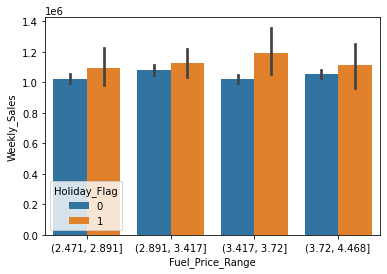

In [93]:
sns.barplot(x=df['Fuel_Price_Range'],y=df['Weekly_Sales'],hue=df['Holiday_Flag'])

<AxesSubplot:xlabel='Fuel_Price_Range', ylabel='Weekly_Sales'>

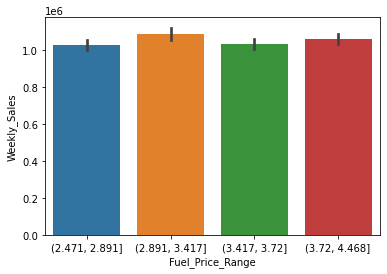

In [94]:
sns.barplot(x=df['Fuel_Price_Range'],y=df['Weekly_Sales'])

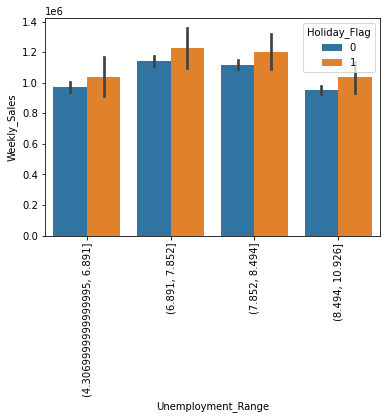

In [95]:
sns.barplot(x=df['Unemployment_Range'],y=df['Weekly_Sales'],hue=df['Holiday_Flag'])
plt.xticks(rotation=90)
plt.show()

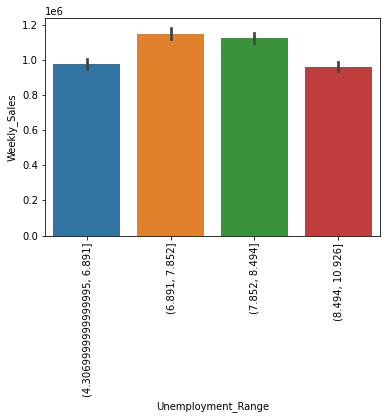

In [96]:
sns.barplot(x=df['Unemployment_Range'],y=df['Weekly_Sales'])
plt.xticks(rotation=90)
plt.show()

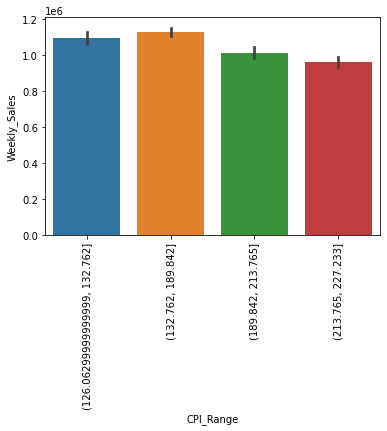

In [97]:
sns.barplot(x=df['CPI_Range'],y=df['Weekly_Sales'])
plt.xticks(rotation=90)
plt.show()

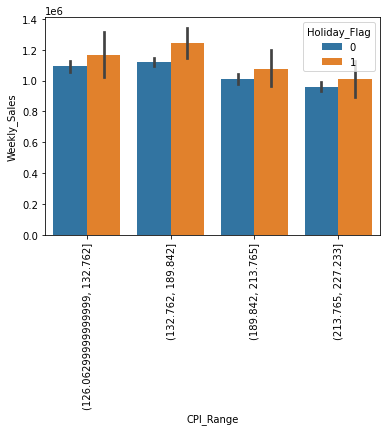

In [98]:
sns.barplot(x=df['CPI_Range'],y=df['Weekly_Sales'],hue=df['Holiday_Flag'])
plt.xticks(rotation=90)
plt.show()

In [99]:
df

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year,Day,quarter,week,Day Of Week,Day_Name,Temperature_Range,Fuel_Price_Range,CPI_Range,Unemployment_Range
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,5,2010,2,2010Q2,17,6,Sunday,"(7.459, 46.795]","(2.471, 2.891]","(189.842, 213.765]","(7.852, 8.494]"
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,12,2010,2,2010Q4,48,3,Thursday,"(7.459, 46.795]","(2.471, 2.891]","(189.842, 213.765]","(7.852, 8.494]"
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010,19,2010Q1,7,4,Friday,"(7.459, 46.795]","(2.471, 2.891]","(189.842, 213.765]","(7.852, 8.494]"
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010,26,2010Q1,8,4,Friday,"(7.459, 46.795]","(2.471, 2.891]","(189.842, 213.765]","(7.852, 8.494]"
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,5,2010,3,2010Q2,18,0,Monday,"(7.459, 46.795]","(2.471, 2.891]","(189.842, 213.765]","(7.852, 8.494]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,713173.95,0,64.88,3.997,192.013558,8.684,9,2012,28,2012Q3,39,4,Friday,"(62.4, 74.665]","(3.72, 4.468]","(189.842, 213.765]","(8.494, 10.926]"
6431,45,733455.07,0,64.89,3.985,192.170412,8.667,5,2012,10,2012Q2,19,3,Thursday,"(62.4, 74.665]","(3.72, 4.468]","(189.842, 213.765]","(8.494, 10.926]"
6432,45,734464.36,0,54.47,4.000,192.327265,8.667,12,2012,10,2012Q4,50,0,Monday,"(46.795, 62.4]","(3.72, 4.468]","(189.842, 213.765]","(8.494, 10.926]"
6433,45,718125.53,0,56.47,3.969,192.330854,8.667,10,2012,19,2012Q4,42,4,Friday,"(46.795, 62.4]","(3.72, 4.468]","(189.842, 213.765]","(8.494, 10.926]"


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Temperature', ylabel='Density'>

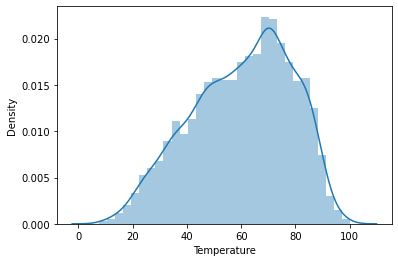

In [100]:
sns.distplot(df['Temperature'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fuel_Price', ylabel='Density'>

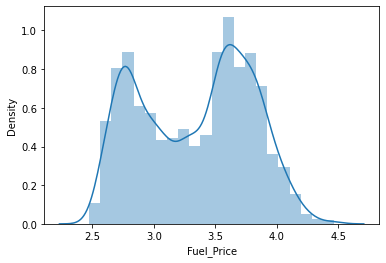

In [101]:
sns.distplot(df['Fuel_Price'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Unemployment', ylabel='Density'>

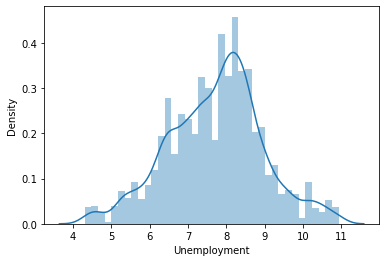

In [102]:
sns.distplot(df['Unemployment'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CPI', ylabel='Density'>

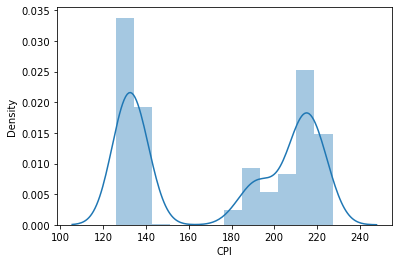

In [103]:
sns.distplot(df['CPI'])

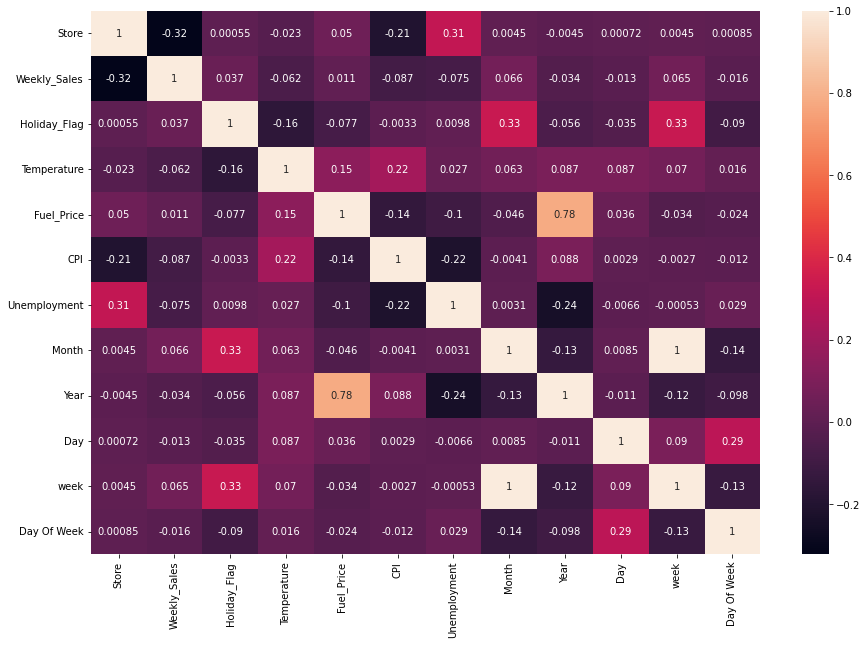

In [104]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [105]:
df

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year,Day,quarter,week,Day Of Week,Day_Name,Temperature_Range,Fuel_Price_Range,CPI_Range,Unemployment_Range
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,5,2010,2,2010Q2,17,6,Sunday,"(7.459, 46.795]","(2.471, 2.891]","(189.842, 213.765]","(7.852, 8.494]"
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,12,2010,2,2010Q4,48,3,Thursday,"(7.459, 46.795]","(2.471, 2.891]","(189.842, 213.765]","(7.852, 8.494]"
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010,19,2010Q1,7,4,Friday,"(7.459, 46.795]","(2.471, 2.891]","(189.842, 213.765]","(7.852, 8.494]"
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010,26,2010Q1,8,4,Friday,"(7.459, 46.795]","(2.471, 2.891]","(189.842, 213.765]","(7.852, 8.494]"
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,5,2010,3,2010Q2,18,0,Monday,"(7.459, 46.795]","(2.471, 2.891]","(189.842, 213.765]","(7.852, 8.494]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,713173.95,0,64.88,3.997,192.013558,8.684,9,2012,28,2012Q3,39,4,Friday,"(62.4, 74.665]","(3.72, 4.468]","(189.842, 213.765]","(8.494, 10.926]"
6431,45,733455.07,0,64.89,3.985,192.170412,8.667,5,2012,10,2012Q2,19,3,Thursday,"(62.4, 74.665]","(3.72, 4.468]","(189.842, 213.765]","(8.494, 10.926]"
6432,45,734464.36,0,54.47,4.000,192.327265,8.667,12,2012,10,2012Q4,50,0,Monday,"(46.795, 62.4]","(3.72, 4.468]","(189.842, 213.765]","(8.494, 10.926]"
6433,45,718125.53,0,56.47,3.969,192.330854,8.667,10,2012,19,2012Q4,42,4,Friday,"(46.795, 62.4]","(3.72, 4.468]","(189.842, 213.765]","(8.494, 10.926]"


In [106]:
df

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year,Day,quarter,week,Day Of Week,Day_Name,Temperature_Range,Fuel_Price_Range,CPI_Range,Unemployment_Range
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,5,2010,2,2010Q2,17,6,Sunday,"(7.459, 46.795]","(2.471, 2.891]","(189.842, 213.765]","(7.852, 8.494]"
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,12,2010,2,2010Q4,48,3,Thursday,"(7.459, 46.795]","(2.471, 2.891]","(189.842, 213.765]","(7.852, 8.494]"
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010,19,2010Q1,7,4,Friday,"(7.459, 46.795]","(2.471, 2.891]","(189.842, 213.765]","(7.852, 8.494]"
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010,26,2010Q1,8,4,Friday,"(7.459, 46.795]","(2.471, 2.891]","(189.842, 213.765]","(7.852, 8.494]"
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,5,2010,3,2010Q2,18,0,Monday,"(7.459, 46.795]","(2.471, 2.891]","(189.842, 213.765]","(7.852, 8.494]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,713173.95,0,64.88,3.997,192.013558,8.684,9,2012,28,2012Q3,39,4,Friday,"(62.4, 74.665]","(3.72, 4.468]","(189.842, 213.765]","(8.494, 10.926]"
6431,45,733455.07,0,64.89,3.985,192.170412,8.667,5,2012,10,2012Q2,19,3,Thursday,"(62.4, 74.665]","(3.72, 4.468]","(189.842, 213.765]","(8.494, 10.926]"
6432,45,734464.36,0,54.47,4.000,192.327265,8.667,12,2012,10,2012Q4,50,0,Monday,"(46.795, 62.4]","(3.72, 4.468]","(189.842, 213.765]","(8.494, 10.926]"
6433,45,718125.53,0,56.47,3.969,192.330854,8.667,10,2012,19,2012Q4,42,4,Friday,"(46.795, 62.4]","(3.72, 4.468]","(189.842, 213.765]","(8.494, 10.926]"


# Top 10 Stores with Highest Weekly Sales in all Years

In [107]:
label_df=df.groupby("Store")['Weekly_Sales'].mean().sort_values(ascending=False).index


In [108]:
label_df

Int64Index([20,  4, 14, 13,  2, 10, 27,  6,  1, 39, 19, 23, 31, 24, 11, 41, 28,
            32, 18, 22, 26, 40, 34, 12, 35,  8, 17, 45, 21, 25, 43, 15,  7, 42,
             9, 29, 16, 37, 30, 38,  3, 36,  5, 44, 33],
           dtype='int64', name='Store')

In [109]:
value_df=df.groupby("Store")['Weekly_Sales'].mean().sort_values(ascending=False).values


In [110]:
value_df

array([2107676.87034965, 2088551.09611111, 2020978.40097902,
       2003620.30629371, 1925751.33552448, 1899424.57265734,
       1775216.20195804, 1564728.18629371, 1555264.39755245,
       1450668.12916084, 1444999.03566434, 1399826.391     ,
       1395901.43706294, 1356755.39356643, 1356383.12447552,
       1268125.41881119, 1241574.57647059, 1166568.15496503,
       1084718.42104895, 1028501.03895105, 1004217.6665493 ,
        966979.0245    ,  966781.55944056,  963924.16411765,
        919724.97958042,  908749.51839161,  892246.95556338,
        785981.40853147,  756069.08335664,  706721.53265734,
        633324.72314685,  623312.47496503,  570705.96739437,
        556403.86314685,  543980.55237762,  539451.42874126,
        519247.73006993,  518900.28195804,  438579.61622378,
        432198.75823529,  402704.44104895,  373511.9927972 ,
        318011.81048951,  302748.86601399,  259861.69202797])

<AxesSubplot:xlabel='Store'>

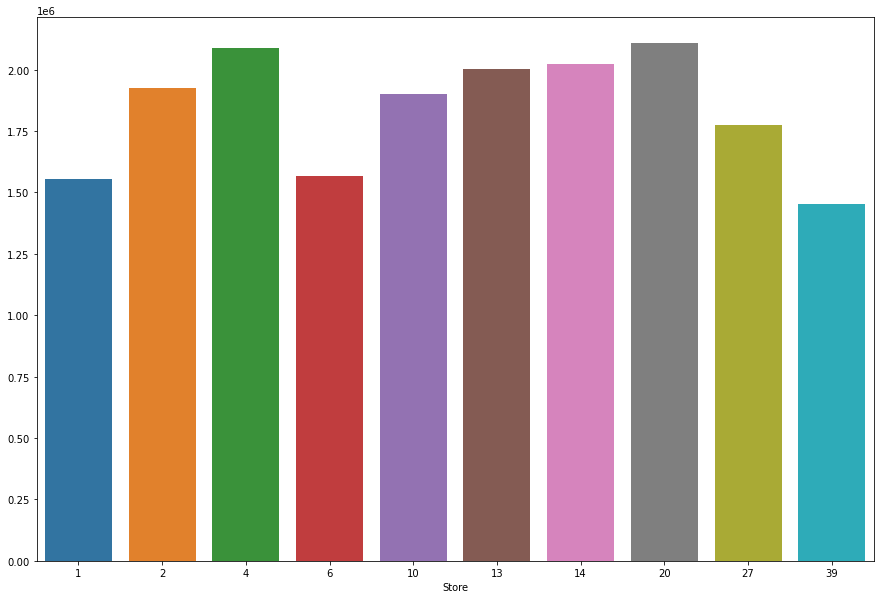

In [111]:
plt.figure(figsize=(15,10))
sns.barplot(x=label_df[:10],y=value_df[:10])


# Bottom 10 Stores with Lowest Weekly Sales in all Years

In [112]:
label_df=df.groupby("Store")['Weekly_Sales'].mean().sort_values(ascending=True).index


In [113]:
label_df

Int64Index([33, 44,  5, 36,  3, 38, 30, 37, 16, 29,  9, 42,  7, 15, 43, 25, 21,
            45, 17,  8, 35, 12, 34, 40, 26, 22, 18, 32, 28, 41, 11, 24, 31, 23,
            19, 39,  1,  6, 27, 10,  2, 13, 14,  4, 20],
           dtype='int64', name='Store')

In [114]:
value_df=df.groupby("Store")['Weekly_Sales'].mean().sort_values(ascending=True).values


In [115]:
value_df

array([ 259861.69202797,  302748.86601399,  318011.81048951,
        373511.9927972 ,  402704.44104895,  432198.75823529,
        438579.61622378,  518900.28195804,  519247.73006993,
        539451.42874126,  543980.55237762,  556403.86314685,
        570705.96739437,  623312.47496503,  633324.72314685,
        706721.53265734,  756069.08335664,  785981.40853147,
        892246.95556338,  908749.51839161,  919724.97958042,
        963924.16411765,  966781.55944056,  966979.0245    ,
       1004217.6665493 , 1028501.03895105, 1084718.42104895,
       1166568.15496503, 1241574.57647059, 1268125.41881119,
       1356383.12447552, 1356755.39356643, 1395901.43706294,
       1399826.391     , 1444999.03566434, 1450668.12916084,
       1555264.39755245, 1564728.18629371, 1775216.20195804,
       1899424.57265734, 1925751.33552448, 2003620.30629371,
       2020978.40097902, 2088551.09611111, 2107676.87034965])

<AxesSubplot:xlabel='Store'>

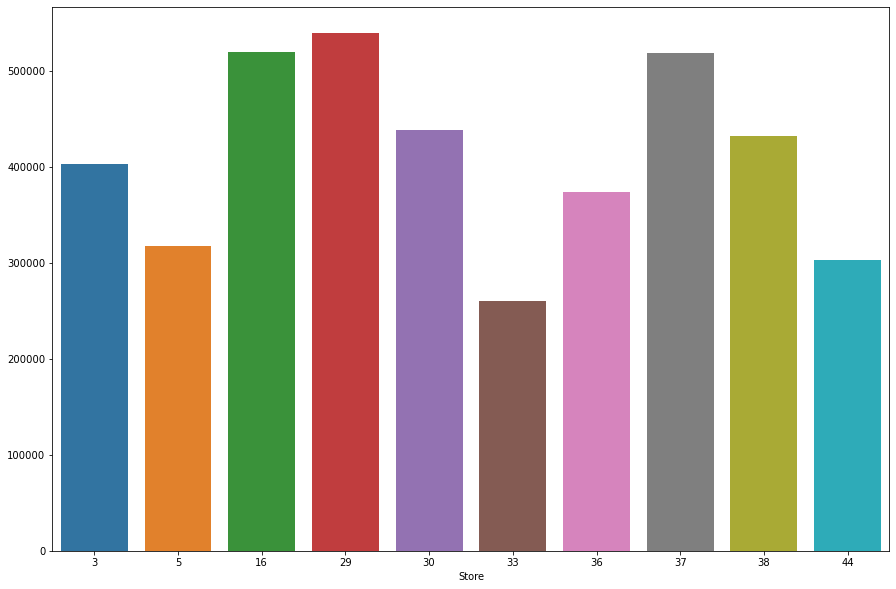

In [116]:
plt.figure(figsize=(15,10))
sns.barplot(x=label_df[:10],y=value_df[:10])


# Top 10 Stores with highest Weekly Sales for the year 2012

In [117]:
year_2012_df=df.groupby("Year").get_group(2012)


In [118]:
year_2012_df

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year,Day,quarter,week,Day Of Week,Day_Name,Temperature_Range,Fuel_Price_Range,CPI_Range,Unemployment_Range
100,1,1550369.92,0,49.01,3.157,219.714258,7.348,6,2012,1,2012Q2,22,4,Friday,"(46.795, 62.4]","(2.891, 3.417]","(213.765, 227.233]","(6.891, 7.852]"
101,1,1459601.17,0,48.53,3.261,219.892526,7.348,1,2012,13,2012Q1,2,4,Friday,"(46.795, 62.4]","(2.891, 3.417]","(213.765, 227.233]","(6.891, 7.852]"
102,1,1394393.84,0,54.11,3.268,219.985689,7.348,1,2012,20,2012Q1,3,4,Friday,"(46.795, 62.4]","(2.891, 3.417]","(213.765, 227.233]","(6.891, 7.852]"
103,1,1319325.59,0,54.26,3.290,220.078852,7.348,1,2012,27,2012Q1,4,4,Friday,"(46.795, 62.4]","(2.891, 3.417]","(213.765, 227.233]","(6.891, 7.852]"
104,1,1636339.65,0,56.55,3.360,220.172015,7.348,3,2012,2,2012Q1,9,4,Friday,"(46.795, 62.4]","(2.891, 3.417]","(213.765, 227.233]","(6.891, 7.852]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,713173.95,0,64.88,3.997,192.013558,8.684,9,2012,28,2012Q3,39,4,Friday,"(62.4, 74.665]","(3.72, 4.468]","(189.842, 213.765]","(8.494, 10.926]"
6431,45,733455.07,0,64.89,3.985,192.170412,8.667,5,2012,10,2012Q2,19,3,Thursday,"(62.4, 74.665]","(3.72, 4.468]","(189.842, 213.765]","(8.494, 10.926]"
6432,45,734464.36,0,54.47,4.000,192.327265,8.667,12,2012,10,2012Q4,50,0,Monday,"(46.795, 62.4]","(3.72, 4.468]","(189.842, 213.765]","(8.494, 10.926]"
6433,45,718125.53,0,56.47,3.969,192.330854,8.667,10,2012,19,2012Q4,42,4,Friday,"(46.795, 62.4]","(3.72, 4.468]","(189.842, 213.765]","(8.494, 10.926]"


In [119]:
label_df=year_2012_df.groupby("Store")['Weekly_Sales'].mean().sort_values(ascending=False).index


In [120]:
label_df

Int64Index([ 4, 20, 13,  2, 10, 14, 27,  1,  6, 39, 31, 19, 11, 24, 41, 28, 32,
            18, 26, 22, 34, 12, 17,  8, 35, 45, 21, 25, 43,  7, 42, 15,  9, 37,
            29, 16, 30, 38,  3, 44,  5, 36, 33],
           dtype='int64', name='Store')

In [121]:
value_df=year_2012_df.groupby("Store")['Weekly_Sales'].mean().sort_values(ascending=False).values


In [122]:
value_df

array([2168641.30653846, 2089016.4972093 , 2016452.44232558,
       1895271.98534884, 1819270.16139535, 1800962.75023256,
       1672559.44465116, 1586094.37255814, 1542210.39534884,
       1532224.71744186, 1392660.63302326, 1377033.33209302,
       1353117.80651163, 1329916.19      , 1322973.02162791,
       1241574.57647059, 1169328.27906977, 1044618.06511628,
        999452.1927907 ,  991992.00534884,  970678.23604651,
        963924.16411765,  936869.27046512,  912416.7472093 ,
        819481.91906977,  761014.65511628,  703532.24906977,
        685825.71418605,  627331.02255814,  589943.17372093,
        580240.92674419,  577384.43511628,  557535.57162791,
        525878.48116279,  517311.20046512,  514009.89116279,
        437108.14139535,  432198.75823529,  419173.01162791,
        329938.92372093,  329507.86348837,  308987.68674419,
        265943.0472093 ])

<AxesSubplot:xlabel='Store'>

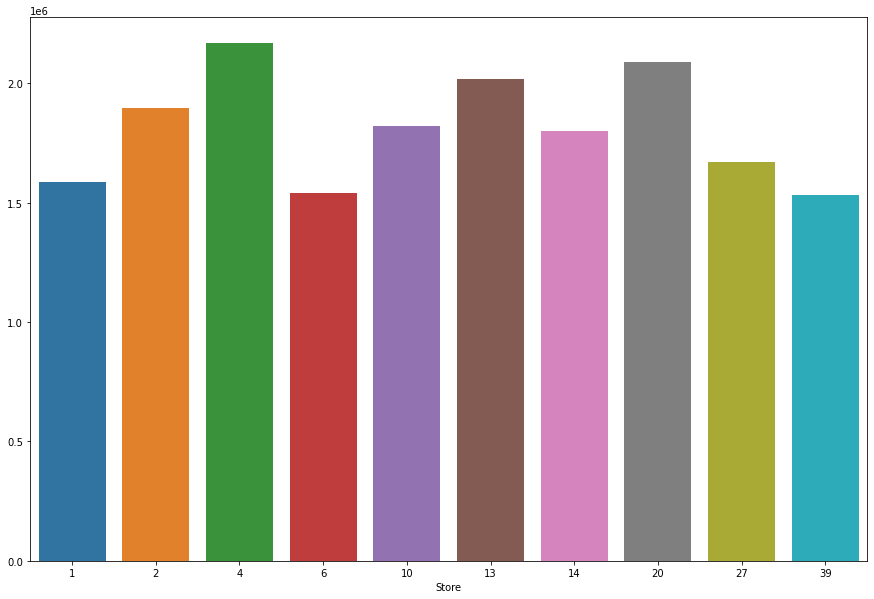

In [123]:
plt.figure(figsize=(15,10))
sns.barplot(x=label_df[:10],y=value_df[:10])


# Highest Weekly Sales on Holiday in which Year

In [124]:
df

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year,Day,quarter,week,Day Of Week,Day_Name,Temperature_Range,Fuel_Price_Range,CPI_Range,Unemployment_Range
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,5,2010,2,2010Q2,17,6,Sunday,"(7.459, 46.795]","(2.471, 2.891]","(189.842, 213.765]","(7.852, 8.494]"
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,12,2010,2,2010Q4,48,3,Thursday,"(7.459, 46.795]","(2.471, 2.891]","(189.842, 213.765]","(7.852, 8.494]"
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010,19,2010Q1,7,4,Friday,"(7.459, 46.795]","(2.471, 2.891]","(189.842, 213.765]","(7.852, 8.494]"
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010,26,2010Q1,8,4,Friday,"(7.459, 46.795]","(2.471, 2.891]","(189.842, 213.765]","(7.852, 8.494]"
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,5,2010,3,2010Q2,18,0,Monday,"(7.459, 46.795]","(2.471, 2.891]","(189.842, 213.765]","(7.852, 8.494]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,713173.95,0,64.88,3.997,192.013558,8.684,9,2012,28,2012Q3,39,4,Friday,"(62.4, 74.665]","(3.72, 4.468]","(189.842, 213.765]","(8.494, 10.926]"
6431,45,733455.07,0,64.89,3.985,192.170412,8.667,5,2012,10,2012Q2,19,3,Thursday,"(62.4, 74.665]","(3.72, 4.468]","(189.842, 213.765]","(8.494, 10.926]"
6432,45,734464.36,0,54.47,4.000,192.327265,8.667,12,2012,10,2012Q4,50,0,Monday,"(46.795, 62.4]","(3.72, 4.468]","(189.842, 213.765]","(8.494, 10.926]"
6433,45,718125.53,0,56.47,3.969,192.330854,8.667,10,2012,19,2012Q4,42,4,Friday,"(46.795, 62.4]","(3.72, 4.468]","(189.842, 213.765]","(8.494, 10.926]"


In [125]:
holiday_df=df.groupby("Holiday_Flag").get_group(1)


In [126]:
holiday_df

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year,Day,quarter,week,Day Of Week,Day_Name,Temperature_Range,Fuel_Price_Range,CPI_Range,Unemployment_Range
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,12,2010,2,2010Q4,48,3,Thursday,"(7.459, 46.795]","(2.471, 2.891]","(189.842, 213.765]","(7.852, 8.494]"
31,1,1507460.69,1,78.69,2.565,211.495190,7.787,10,2010,9,2010Q4,40,5,Saturday,"(74.665, 100.14]","(2.471, 2.891]","(189.842, 213.765]","(6.891, 7.852]"
42,1,1955624.11,1,64.52,2.735,211.748433,7.838,11,2010,26,2010Q4,47,4,Friday,"(62.4, 74.665]","(2.471, 2.891]","(189.842, 213.765]","(6.891, 7.852]"
47,1,1367320.01,1,48.43,2.943,211.404932,7.838,12,2010,31,2010Q4,52,4,Friday,"(46.795, 62.4]","(2.891, 3.417]","(189.842, 213.765]","(6.891, 7.852]"
53,1,1649614.93,1,36.39,3.022,212.936705,7.742,11,2011,2,2011Q4,44,2,Wednesday,"(7.459, 46.795]","(2.891, 3.417]","(189.842, 213.765]","(6.891, 7.852]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6375,45,746129.56,1,71.48,3.738,186.673738,8.625,9,2011,9,2011Q3,36,4,Friday,"(62.4, 74.665]","(3.72, 4.468]","(132.762, 189.842]","(8.494, 10.926]"
6386,45,1170672.94,1,48.71,3.492,188.350400,8.523,11,2011,25,2011Q4,47,4,Friday,"(46.795, 62.4]","(3.417, 3.72]","(132.762, 189.842]","(8.494, 10.926]"
6391,45,869403.63,1,37.79,3.389,189.062016,8.523,12,2011,30,2011Q4,52,4,Friday,"(7.459, 46.795]","(2.891, 3.417]","(132.762, 189.842]","(8.494, 10.926]"
6397,45,803657.12,1,37.00,3.640,189.707605,8.424,10,2012,2,2012Q4,40,1,Tuesday,"(7.459, 46.795]","(3.417, 3.72]","(132.762, 189.842]","(7.852, 8.494]"


In [127]:
label_df=holiday_df.groupby("Year")['Weekly_Sales'].mean().sort_values(ascending=False).index


In [128]:
value_df=holiday_df.groupby("Year")['Weekly_Sales'].mean().sort_values(ascending=False).values


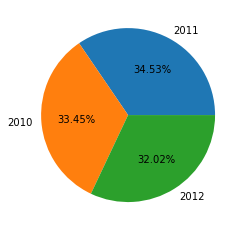

In [129]:
plt.pie(x=value_df,labels=label_df,autopct="%1.2f%%")
plt.show()

# Highest Weekly Sales on NON-Holiday in which Year

In [130]:
non_holiday_df=df.groupby("Holiday_Flag").get_group(0)


In [131]:
non_holiday_df

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year,Day,quarter,week,Day Of Week,Day_Name,Temperature_Range,Fuel_Price_Range,CPI_Range,Unemployment_Range
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,5,2010,2,2010Q2,17,6,Sunday,"(7.459, 46.795]","(2.471, 2.891]","(189.842, 213.765]","(7.852, 8.494]"
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010,19,2010Q1,7,4,Friday,"(7.459, 46.795]","(2.471, 2.891]","(189.842, 213.765]","(7.852, 8.494]"
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010,26,2010Q1,8,4,Friday,"(7.459, 46.795]","(2.471, 2.891]","(189.842, 213.765]","(7.852, 8.494]"
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,5,2010,3,2010Q2,18,0,Monday,"(7.459, 46.795]","(2.471, 2.891]","(189.842, 213.765]","(7.852, 8.494]"
5,1,1439541.59,0,57.79,2.667,211.380643,8.106,12,2010,3,2010Q4,48,4,Friday,"(46.795, 62.4]","(2.471, 2.891]","(189.842, 213.765]","(7.852, 8.494]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,713173.95,0,64.88,3.997,192.013558,8.684,9,2012,28,2012Q3,39,4,Friday,"(62.4, 74.665]","(3.72, 4.468]","(189.842, 213.765]","(8.494, 10.926]"
6431,45,733455.07,0,64.89,3.985,192.170412,8.667,5,2012,10,2012Q2,19,3,Thursday,"(62.4, 74.665]","(3.72, 4.468]","(189.842, 213.765]","(8.494, 10.926]"
6432,45,734464.36,0,54.47,4.000,192.327265,8.667,12,2012,10,2012Q4,50,0,Monday,"(46.795, 62.4]","(3.72, 4.468]","(189.842, 213.765]","(8.494, 10.926]"
6433,45,718125.53,0,56.47,3.969,192.330854,8.667,10,2012,19,2012Q4,42,4,Friday,"(46.795, 62.4]","(3.72, 4.468]","(189.842, 213.765]","(8.494, 10.926]"


In [132]:
label_df=non_holiday_df.groupby("Year")['Weekly_Sales'].mean().sort_values(ascending=False).index


In [133]:
value_df=non_holiday_df.groupby("Year")['Weekly_Sales'].mean().sort_values(ascending=False).values


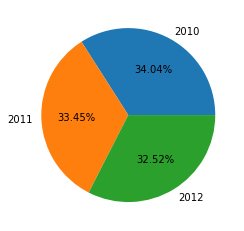

In [134]:
plt.pie(x=value_df,labels=label_df,autopct="%1.2f%%")
plt.show()

In [135]:
df.columns

Index(['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment', 'Month', 'Year', 'Day', 'quarter', 'week',
       'Day Of Week', 'Day_Name', 'Temperature_Range', 'Fuel_Price_Range',
       'CPI_Range', 'Unemployment_Range'],
      dtype='object')

# Find Average Weekly Sales for the year 2011 for Month 5

In [136]:
df

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year,Day,quarter,week,Day Of Week,Day_Name,Temperature_Range,Fuel_Price_Range,CPI_Range,Unemployment_Range
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,5,2010,2,2010Q2,17,6,Sunday,"(7.459, 46.795]","(2.471, 2.891]","(189.842, 213.765]","(7.852, 8.494]"
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,12,2010,2,2010Q4,48,3,Thursday,"(7.459, 46.795]","(2.471, 2.891]","(189.842, 213.765]","(7.852, 8.494]"
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010,19,2010Q1,7,4,Friday,"(7.459, 46.795]","(2.471, 2.891]","(189.842, 213.765]","(7.852, 8.494]"
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010,26,2010Q1,8,4,Friday,"(7.459, 46.795]","(2.471, 2.891]","(189.842, 213.765]","(7.852, 8.494]"
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,5,2010,3,2010Q2,18,0,Monday,"(7.459, 46.795]","(2.471, 2.891]","(189.842, 213.765]","(7.852, 8.494]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,713173.95,0,64.88,3.997,192.013558,8.684,9,2012,28,2012Q3,39,4,Friday,"(62.4, 74.665]","(3.72, 4.468]","(189.842, 213.765]","(8.494, 10.926]"
6431,45,733455.07,0,64.89,3.985,192.170412,8.667,5,2012,10,2012Q2,19,3,Thursday,"(62.4, 74.665]","(3.72, 4.468]","(189.842, 213.765]","(8.494, 10.926]"
6432,45,734464.36,0,54.47,4.000,192.327265,8.667,12,2012,10,2012Q4,50,0,Monday,"(46.795, 62.4]","(3.72, 4.468]","(189.842, 213.765]","(8.494, 10.926]"
6433,45,718125.53,0,56.47,3.969,192.330854,8.667,10,2012,19,2012Q4,42,4,Friday,"(46.795, 62.4]","(3.72, 4.468]","(189.842, 213.765]","(8.494, 10.926]"


In [137]:
year_2011_df=df.groupby("Year").get_group(2011)



In [138]:
year_2011_df

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year,Day,quarter,week,Day Of Week,Day_Name,Temperature_Range,Fuel_Price_Range,CPI_Range,Unemployment_Range
48,1,1444732.28,0,48.27,2.976,211.404742,7.742,7,2011,1,2011Q3,26,4,Friday,"(46.795, 62.4]","(2.891, 3.417]","(189.842, 213.765]","(6.891, 7.852]"
49,1,1391013.96,0,35.40,2.983,211.457411,7.742,1,2011,14,2011Q1,2,4,Friday,"(7.459, 46.795]","(2.891, 3.417]","(189.842, 213.765]","(6.891, 7.852]"
50,1,1327405.42,0,44.04,3.016,211.827234,7.742,1,2011,21,2011Q1,3,4,Friday,"(7.459, 46.795]","(2.891, 3.417]","(189.842, 213.765]","(6.891, 7.852]"
51,1,1316899.31,0,43.83,3.010,212.197058,7.742,1,2011,28,2011Q1,4,4,Friday,"(7.459, 46.795]","(2.891, 3.417]","(189.842, 213.765]","(6.891, 7.852]"
52,1,1606629.58,0,42.27,2.989,212.566881,7.742,4,2011,2,2011Q2,13,5,Saturday,"(7.459, 46.795]","(2.891, 3.417]","(189.842, 213.765]","(6.891, 7.852]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387,45,875699.81,0,50.19,3.452,188.502435,8.523,2,2011,12,2011Q1,6,5,Saturday,"(46.795, 62.4]","(3.417, 3.72]","(132.762, 189.842]","(8.494, 10.926]"
6388,45,957155.31,0,46.57,3.415,188.654469,8.523,9,2011,12,2011Q3,37,0,Monday,"(7.459, 46.795]","(2.891, 3.417]","(132.762, 189.842]","(8.494, 10.926]"
6389,45,1078905.68,0,39.93,3.413,188.797935,8.523,12,2011,16,2011Q4,50,4,Friday,"(7.459, 46.795]","(2.891, 3.417]","(132.762, 189.842]","(8.494, 10.926]"
6390,45,1521957.99,0,42.27,3.389,188.929975,8.523,12,2011,23,2011Q4,51,4,Friday,"(7.459, 46.795]","(2.891, 3.417]","(132.762, 189.842]","(8.494, 10.926]"


In [139]:
month_5_df=year_2011_df.groupby("Month").get_group(5)


In [140]:
month_5_df

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year,Day,quarter,week,Day Of Week,Day_Name,Temperature_Range,Fuel_Price_Range,CPI_Range,Unemployment_Range
66,1,1604775.58,0,75.64,3.899,215.964053,7.682,5,2011,13,2011Q2,19,4,Friday,"(74.665, 100.14]","(3.72, 4.468]","(213.765, 227.233]","(6.891, 7.852]"
67,1,1428218.27,0,67.63,3.907,215.733920,7.682,5,2011,20,2011Q2,20,4,Friday,"(62.4, 74.665]","(3.72, 4.468]","(213.765, 227.233]","(6.891, 7.852]"
68,1,1466046.67,0,77.72,3.786,215.503788,7.682,5,2011,27,2011Q2,21,4,Friday,"(74.665, 100.14]","(3.72, 4.468]","(213.765, 227.233]","(6.891, 7.852]"
78,1,1624383.75,0,91.65,3.684,215.544618,7.962,5,2011,8,2011Q2,18,6,Sunday,"(74.665, 100.14]","(3.417, 3.72]","(213.765, 227.233]","(7.852, 8.494]"
209,2,1838513.07,0,74.61,3.899,215.612473,7.931,5,2011,13,2011Q2,19,4,Friday,"(62.4, 74.665]","(3.72, 4.468]","(213.765, 227.233]","(7.852, 8.494]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6227,44,298080.45,0,75.56,3.595,129.184645,6.560,5,2011,8,2011Q2,18,6,Sunday,"(74.665, 100.14]","(3.417, 3.72]","(126.06299999999999, 132.762]","(4.3069999999999995, 6.891]"
6358,45,793889.10,0,60.38,4.066,186.071923,8.521,5,2011,13,2011Q2,19,4,Friday,"(46.795, 62.4]","(3.72, 4.468]","(132.762, 189.842]","(8.494, 10.926]"
6359,45,727163.67,0,62.28,4.062,185.966115,8.521,5,2011,20,2011Q2,20,4,Friday,"(46.795, 62.4]","(3.72, 4.468]","(132.762, 189.842]","(8.494, 10.926]"
6360,45,817653.25,0,69.70,3.985,185.860308,8.521,5,2011,27,2011Q2,21,4,Friday,"(62.4, 74.665]","(3.72, 4.468]","(132.762, 189.842]","(8.494, 10.926]"


<AxesSubplot:xlabel='Day Of Week', ylabel='Weekly_Sales'>

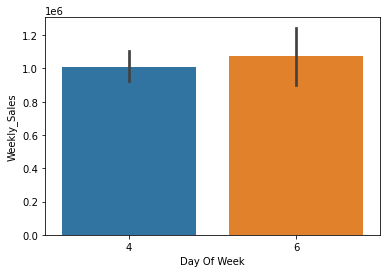

In [141]:
sns.barplot(x=month_5_df['Day Of Week'],y=month_5_df['Weekly_Sales'])

<AxesSubplot:xlabel='week', ylabel='Weekly_Sales'>

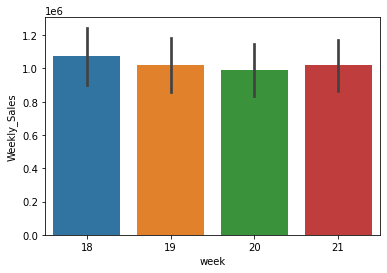

In [142]:
sns.barplot(x=month_5_df['week'],y=month_5_df['Weekly_Sales'])

<AxesSubplot:xlabel='Day', ylabel='Weekly_Sales'>

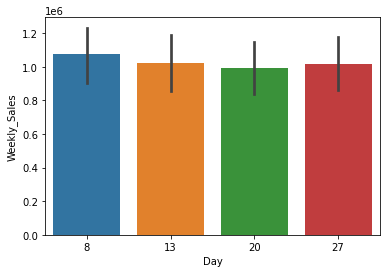

In [143]:
sns.barplot(x=month_5_df['Day'],y=month_5_df['Weekly_Sales'])

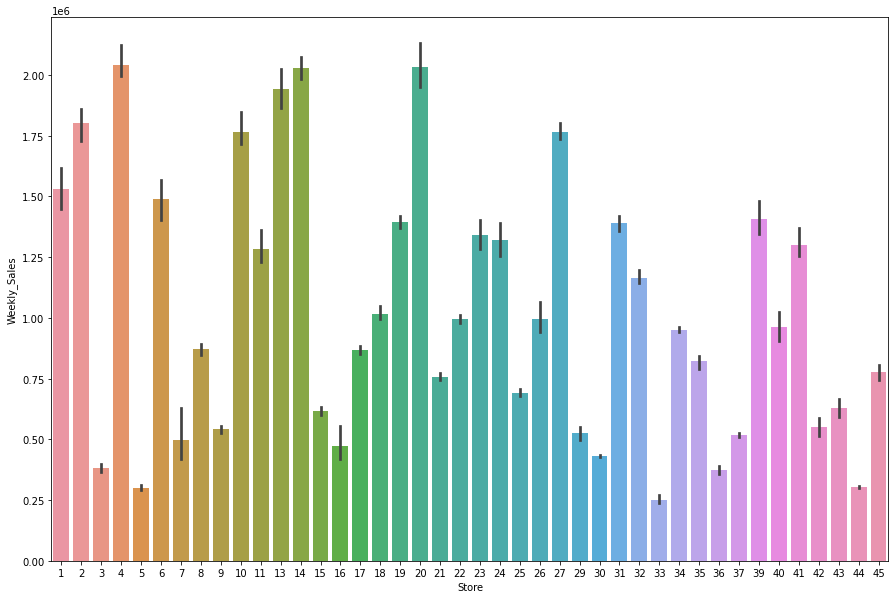

In [144]:
plt.figure(figsize=(15,10))
sns.barplot(x=month_5_df['Store'],y=month_5_df['Weekly_Sales'])
plt.show()

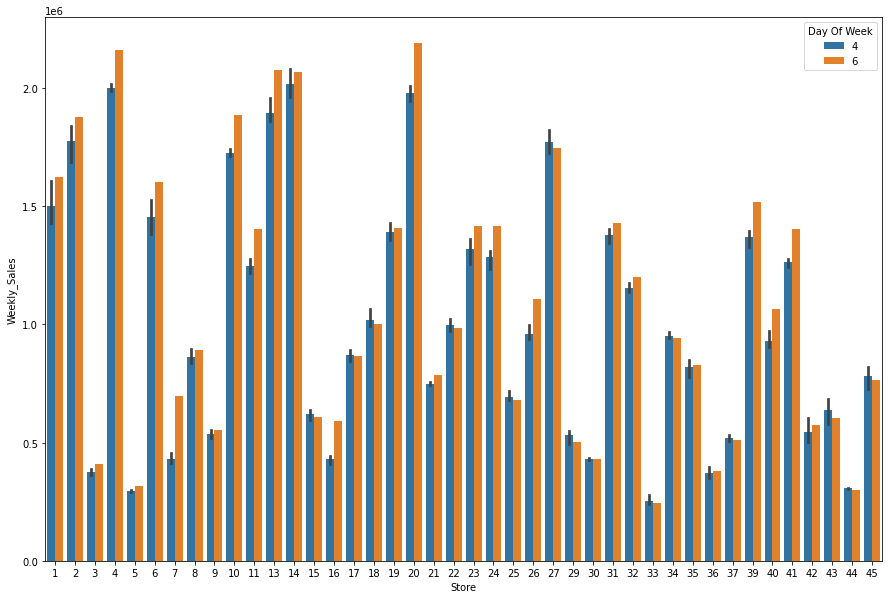

In [145]:
plt.figure(figsize=(15,10))
sns.barplot(x=month_5_df['Store'],y=month_5_df['Weekly_Sales'],hue=month_5_df['Day Of Week'])
plt.show()

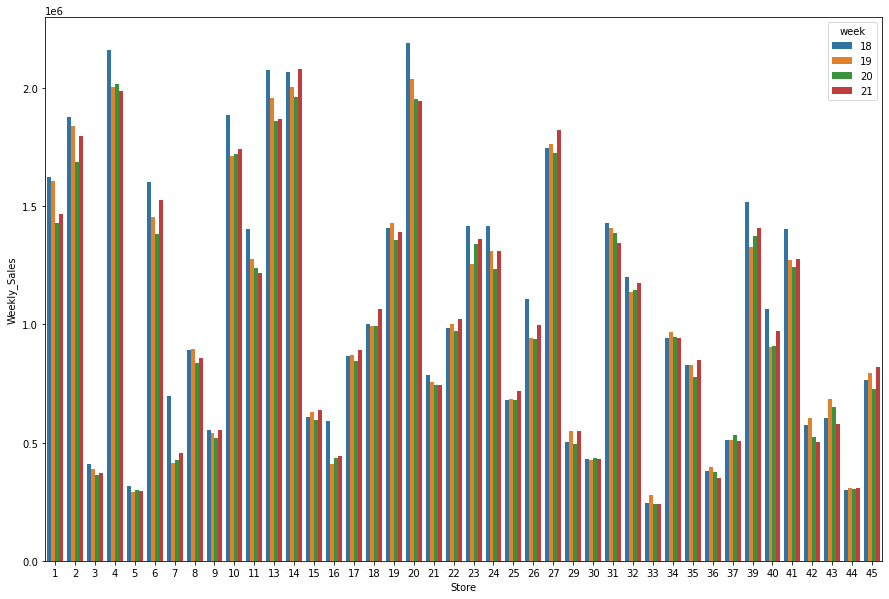

In [146]:
plt.figure(figsize=(15,10))
sns.barplot(x=month_5_df['Store'],y=month_5_df['Weekly_Sales'],hue=month_5_df['week'])
plt.show()

In [147]:
month_5_df

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year,Day,quarter,week,Day Of Week,Day_Name,Temperature_Range,Fuel_Price_Range,CPI_Range,Unemployment_Range
66,1,1604775.58,0,75.64,3.899,215.964053,7.682,5,2011,13,2011Q2,19,4,Friday,"(74.665, 100.14]","(3.72, 4.468]","(213.765, 227.233]","(6.891, 7.852]"
67,1,1428218.27,0,67.63,3.907,215.733920,7.682,5,2011,20,2011Q2,20,4,Friday,"(62.4, 74.665]","(3.72, 4.468]","(213.765, 227.233]","(6.891, 7.852]"
68,1,1466046.67,0,77.72,3.786,215.503788,7.682,5,2011,27,2011Q2,21,4,Friday,"(74.665, 100.14]","(3.72, 4.468]","(213.765, 227.233]","(6.891, 7.852]"
78,1,1624383.75,0,91.65,3.684,215.544618,7.962,5,2011,8,2011Q2,18,6,Sunday,"(74.665, 100.14]","(3.417, 3.72]","(213.765, 227.233]","(7.852, 8.494]"
209,2,1838513.07,0,74.61,3.899,215.612473,7.931,5,2011,13,2011Q2,19,4,Friday,"(62.4, 74.665]","(3.72, 4.468]","(213.765, 227.233]","(7.852, 8.494]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6227,44,298080.45,0,75.56,3.595,129.184645,6.560,5,2011,8,2011Q2,18,6,Sunday,"(74.665, 100.14]","(3.417, 3.72]","(126.06299999999999, 132.762]","(4.3069999999999995, 6.891]"
6358,45,793889.10,0,60.38,4.066,186.071923,8.521,5,2011,13,2011Q2,19,4,Friday,"(46.795, 62.4]","(3.72, 4.468]","(132.762, 189.842]","(8.494, 10.926]"
6359,45,727163.67,0,62.28,4.062,185.966115,8.521,5,2011,20,2011Q2,20,4,Friday,"(46.795, 62.4]","(3.72, 4.468]","(132.762, 189.842]","(8.494, 10.926]"
6360,45,817653.25,0,69.70,3.985,185.860308,8.521,5,2011,27,2011Q2,21,4,Friday,"(62.4, 74.665]","(3.72, 4.468]","(132.762, 189.842]","(8.494, 10.926]"


In [148]:
df

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year,Day,quarter,week,Day Of Week,Day_Name,Temperature_Range,Fuel_Price_Range,CPI_Range,Unemployment_Range
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,5,2010,2,2010Q2,17,6,Sunday,"(7.459, 46.795]","(2.471, 2.891]","(189.842, 213.765]","(7.852, 8.494]"
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,12,2010,2,2010Q4,48,3,Thursday,"(7.459, 46.795]","(2.471, 2.891]","(189.842, 213.765]","(7.852, 8.494]"
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010,19,2010Q1,7,4,Friday,"(7.459, 46.795]","(2.471, 2.891]","(189.842, 213.765]","(7.852, 8.494]"
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010,26,2010Q1,8,4,Friday,"(7.459, 46.795]","(2.471, 2.891]","(189.842, 213.765]","(7.852, 8.494]"
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,5,2010,3,2010Q2,18,0,Monday,"(7.459, 46.795]","(2.471, 2.891]","(189.842, 213.765]","(7.852, 8.494]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,713173.95,0,64.88,3.997,192.013558,8.684,9,2012,28,2012Q3,39,4,Friday,"(62.4, 74.665]","(3.72, 4.468]","(189.842, 213.765]","(8.494, 10.926]"
6431,45,733455.07,0,64.89,3.985,192.170412,8.667,5,2012,10,2012Q2,19,3,Thursday,"(62.4, 74.665]","(3.72, 4.468]","(189.842, 213.765]","(8.494, 10.926]"
6432,45,734464.36,0,54.47,4.000,192.327265,8.667,12,2012,10,2012Q4,50,0,Monday,"(46.795, 62.4]","(3.72, 4.468]","(189.842, 213.765]","(8.494, 10.926]"
6433,45,718125.53,0,56.47,3.969,192.330854,8.667,10,2012,19,2012Q4,42,4,Friday,"(46.795, 62.4]","(3.72, 4.468]","(189.842, 213.765]","(8.494, 10.926]"


In [149]:
df=df.drop(['Day_Name','quarter','Fuel_Price','Temperature_Range','Fuel_Price_Range','CPI_Range','Unemployment_Range'],axis=1)

In [150]:
y=df['Weekly_Sales']

In [151]:
X=df.drop('Weekly_Sales',axis=1)

In [152]:
sc=StandardScaler()


In [153]:
X=sc.fit_transform(X)

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [155]:
X_train.shape

(4760, 10)

In [156]:
X_test.shape

(1191, 10)

# RandomForestRegressor

In [157]:
rfr=RandomForestRegressor()


In [158]:
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [159]:
y_pred=rfr.predict(X_test)


In [160]:
r2_score(y_test,y_pred)

0.9501556371342843

In [161]:
mean_squared_error(y_test,y_pred)

17446024927.869396

In [162]:
y_pred=rfr.predict(X_train)


In [163]:
r2_score(y_train,y_pred)

0.9933428040172136

In [164]:
kf=KFold(5)


In [165]:
scores=cross_val_score(rfr,X_train,y_train,cv=kf)

In [166]:
for idx,value in enumerate(scores):
    print(idx,value)

0 0.947542978316557
1 0.9558341590510981
2 0.9619229063958393
3 0.9435064117361089
4 0.9433940887049482


In [167]:
scores.mean()

0.9504401088409103

# LinearRegression

In [168]:
lr=LinearRegression()


In [169]:
lr.fit(X_train,y_train)

LinearRegression()

In [170]:
y_pred=lr.predict(X_test)


In [171]:
r2_score(y_test,y_pred)

0.15693496382560201

In [172]:
mean_squared_error(y_test,y_pred)

295081184537.1244

In [173]:
y_pred=lr.predict(X_train)


In [174]:
r2_score(y_train,y_pred)

0.12842067936049895

In [175]:
mean_squared_error(y_train,y_pred)

280483652237.2149

In [176]:
kf=KFold(5)


In [177]:
scores=cross_val_score(lr,X_train,y_train,cv=kf)

In [178]:
for idx,value in enumerate(scores):
    print(idx,value)

0 0.12711426256472502
1 0.0971025263262919
2 0.12056945019332521
3 0.12403813774786676
4 0.14833049063354953


In [179]:
scores.mean()

0.12343097349315169

# DecisionTreeRegressor

In [180]:
dtr=DecisionTreeRegressor()


In [181]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [182]:
y_pred=dtr.predict(X_test)


In [183]:
r2_score(y_test,y_pred)

0.9214471530328321

In [184]:
mean_squared_error(y_test,y_pred)

27494281149.432476

In [185]:
y_pred=dtr.predict(X_train)


In [186]:
r2_score(y_train,y_pred)

1.0

In [187]:
kf=KFold(5)


In [188]:
scores=cross_val_score(dtr,X_train,y_train,cv=kf)

In [189]:
for idx,value in enumerate(scores):
    print(idx,value)

0 0.9266637769329586
1 0.9185823018989709
2 0.941989124461005
3 0.900565342679575
4 0.9132587252435876


In [190]:
scores.mean()

0.9202118542432194

# XGBRegressor

In [191]:
xgb_i=xgb.XGBRegressor()


In [192]:
xgb_i.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [193]:
y_pred=xgb_i.predict(X_test)


In [194]:
r2_score(y_test,y_pred)

0.9762393619648309

In [195]:
mean_squared_error(y_test,y_pred)

8316460671.398521

In [196]:
y_pred=xgb_i.predict(X_train)


In [197]:
r2_score(y_train,y_pred)

0.9972592514921066

In [198]:
mean_squared_error(y_train,y_pred)

882002513.3152634

In [199]:
kf=KFold(5)


In [200]:
scores=cross_val_score(xgb_i,X_train,y_train,cv=kf)

In [201]:
for idx,value in enumerate(scores):
    print(idx,value)

0 0.9768936954533559
1 0.9797569150992822
2 0.9801648656654074
3 0.9657899516421884
4 0.9647701731010708


In [202]:
scores.mean()

0.9734751201922609

# KNeighborsRegressor

In [203]:
knr=KNeighborsRegressor()


In [204]:
knr.fit(X_train,y_train)

KNeighborsRegressor()

In [205]:
y_pred=knr.predict(X_test)


In [206]:
r2_score(y_test,y_pred)

0.2526284425020404

In [207]:
mean_squared_error(y_test,y_pred)

261587511061.52283

In [208]:
y_pred=knr.predict(X_train)


In [209]:
r2_score(y_train,y_pred)

0.5000816157747611

In [210]:
mean_squared_error(y_train,y_pred)

160879143076.89166

In [211]:
kf=KFold(5)


In [212]:
scores=cross_val_score(knr,X_train,y_train,cv=kf)

In [213]:
for idx,value in enumerate(scores):
    print(idx,value)

0 0.24927300545598108
1 0.25127258024293087
2 0.22208391031424657
3 0.21571687721548483
4 0.28073817672058243


In [214]:
scores.mean()

0.24381690998984515